# Проект "Исследование рынка компьютерных игр"

## Описание исследования:
Для интернет-магазина, специализирующегося на продажах компьютерных игр по всему миру, требуется провести исследование рынка компьютерных игр. Для исследования предоставлены данные из открытых источников о продажах компьютерных игр, включая информацию о количестве проданных копий по регионам, платформам, годам выхода игр, оценкам пользователей и экспертов. Цель исследования - выявить закономерности, которые определяют успех игры у пользователей и продажи. 

## Задачи исследования:
* Оценить, сколько игр выпускалось в разные годы.
* Изучить, как менялись продажи игр для различных платформ.
* Составить портрет пользователя для каждого региона (Северная Америка, Европа, Япония).
* Сформулировать и проверить гипотезы о наличиии различий в пользовательских рейтингах платформ PC и Xbox.
* Сформулировать и проверить гипотезы о наличиии различий в пользовательских рейтингах игр жанров Action и Sports.

## План исследования:
1. Ознакомиться с предоставленными данными.
2. Провести предобработку данных.
3. Оценить имеющиеся для анализа показатели и, в случае необходимости, добавить новые.
4. Провести исследовательский анализ данных.
5. Составить портреты пользователей для разных регионов.
6. Проверить гипотезы.
7. Сформулировать выводы по итогам проведенного анализа.

## <a name="table_of_contents"></a> Структура проекта:
* 1. [Предобработка данных](#preprocessing)
    * 1.1. [Ознакомление с данными](#first_sight)
    * 1.2. [Работа с пропущенными значениями](#check_null)
    * 1.3. [Изменение типов данных](#data_type_change)
    * 1.4. [Добавление новых параметров](#new_columns_add)
* 2. [Исследовательский анализ данных](#EDA)
    * 2.1. [Количество релизов игр по годам](#games_per_year)
    * 2.2. [Количество проданных игр для каждой платформы](#games_sales_per_platform)
        * 2.2.1. [ТОП 10 игровых платформ по суммарным продажам](#top10_platform)
        * 2.2.2. [Характерный срок существования игровых платформ](#platform_actual_period)
    * 2.3. [Анализ продаж за выбранный актуальный период](#games_sales_actual_period)
    * 2.4. [Влияние оценок пользователей и критиков на продажи](#score_influence)
    * 2.5. [Анализ игровых жанров](#game_genre)
* 3. [Портрет пользователя для каждого региона](#user_portrait)
    * 3.1. [Портрет пользователя: Северная Америка](#north_america_users)
    * 3.2. [Портрет пользователя: Европа](#europe_users)
    * 3.3. [Портрет пользователя: Япония](#japan_users)
* 4. [Проверка статистических гипотез](#stat_hyp_test)
    * 4.1. [Гипотеза о различии пользовательских оценок игр для платформ Xbox One и PC](#hyp_avg_user_score_platform)
    * 4.2. [Гипотеза о различии пользовательских рейтингов для игр жанров Action и Sports](#hyp_avg_user_score_genre)
* 5. [Общий вывод](#conclusion)
    * 5.1. [Обзор проведенного анализа](#what_was_done)
    * 5.2. [Главные выводы](#main_conclusions)
    * 5.3. [Рекомендации](#recommendations)

## <a name="preprocessing"></a> Предобработка данных

### <a name="first_sight"></a> Ознакомление с данными

#### Описание переменных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Улучшение качества отображения графиков
%config InlineBackend.figure_format = 'retina'

# Стиль графиков
sb.set_style('whitegrid')

# Количество знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

# Обработка предупреждений при построении графиков с датами
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
path = 'games.csv'
df_games = pd.read_csv(path)

In [4]:
# Посмотрим на 10 случайных строк из таблицы
df_games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12281,Steambot Chronicles: Battle Tournament,PSP,"2,008.00",Fighting,0.05,0.00,0.01,0.01,54.00,6.3,E10+
13230,BeatMania IIDX 4th Style: New Songs Collection,PS2,"2,001.00",Simulation,0.00,0.00,0.05,0.00,nan,NaN,NaN
1333,NCAA Football 2003,PS2,"2,002.00",Sports,1.16,0.08,0.00,0.19,91.00,8.6,E
4495,MLB 14: The Show,PS3,"2,014.00",Sports,0.35,0.00,0.00,0.08,81.00,6.8,E
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1955,Spider-Man 2,GBA,"2,004.00",Action,0.76,0.28,0.00,0.02,65.00,7.7,E
11624,LEGO Soccer Mania,GBA,"2,002.00",Sports,0.06,0.02,0.00,0.00,nan,NaN,NaN
1671,World Soccer Winning Eleven 9 (JP & Others sales),PSP,"2,005.00",Sports,0.01,0.88,0.31,0.00,nan,NaN,NaN
13743,Banushi Life Game: Winner's Circle,DS,"2,007.00",Sports,0.00,0.00,0.04,0.00,nan,NaN,NaN
7374,Hasbro Family Game Night 3,X360,"2,010.00",Misc,0.17,0.03,0.00,0.02,nan,NaN,NaN


In [5]:
# Общая информация о таблице
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##### Часть столбцов содержит пропуски. Узнаем, какую долю от общего количества составляют пропущенные значения

In [6]:
# Список столбцов с пропущенными значениями
columns_with_nan = ['Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating']

for column in columns_with_nan:
    ratio = (df_games[column].isna().sum() / len(df_games))*100
    print('Доля пропущенных значений в столбце', column, ': {:.2f}%'.format(ratio))

Доля пропущенных значений в столбце Name : 0.01%
Доля пропущенных значений в столбце Year_of_Release : 1.61%
Доля пропущенных значений в столбце Genre : 0.01%
Доля пропущенных значений в столбце Critic_Score : 51.32%
Доля пропущенных значений в столбце User_Score : 40.09%
Доля пропущенных значений в столбце Rating : 40.48%


##### Посмотрим на статистики по столбцам, содержащим продажи и рейтинги

In [7]:
# Статистики по продажам
df_games[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].describe()

,NA_sales,EU_sales,JP_sales,Other_sales
count,"16,715.00","16,715.00","16,715.00","16,715.00"
mean,0.26,0.15,0.08,0.05
std,0.81,0.50,0.31,0.19
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.08,0.02,0.00,0.01
75%,0.24,0.11,0.04,0.03
max,41.36,28.96,10.22,10.57


In [8]:
# Статистики по рейтингам
df_games[['Critic_Score', 'User_Score']].describe()

,Critic_Score
count,"8,137.00"
mean,68.97
std,13.94
min,13.00
25%,60.00
50%,71.00
75%,79.00
max,98.00


##### Столбец `User_Score` содержит не только числовые данные. Нужно будет обработать текстовые значения в этом столбце.

In [9]:
df_games.duplicated().sum()

0

#### Найденные артефакты в данных:
1. Названия всех столбцов начинаются с заглавной буквы. Нужно привести названия к нижнему регистру.
2. Столбец `Year_of_Release` необходимо привести к числовому формату без десятичных знаков.
3. Столбец `User_Score` содержит текстовое значение <b>tbd</b>.
4. Все значения столбца `User_Score` выглядят не корректными - похоже, что при выгрузке возникла ошибка и оценка 84 превратилась в 8.4. 
5. Столбцы `Critic_Score`, `User_Score`, `Rating` содержат большое количество пропусков (около 40% значений пропущено).
6. Столбцы `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales` содержат подозрительно высокие максимальные значения

[Вернуться к оглавлению](#table_of_contents)

### <a name="check_null"></a> Работа с пропущенными значениями

In [10]:
# Заменим названия стобцов
df_games.columns = df_games.columns.str.lower()

# Проверим, что названия столбцов теперь в правильном регистре
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Начнем с обработки пропущенных значений в столбце `year_of_release`.

In [11]:
# Количество пропусков
df_games['year_of_release'].isna().sum()

269

##### Игра может быть как эксклюзивной для одной платформы, так и выпускаться для нескольких платформ сразу. Проверим, сколько игр с пропущенным годом выхода представлены на нескольких платформах.

In [12]:
df_games[df_games['year_of_release'].isna() == True]['name'].value_counts()

LEGO Harry Potter: Years 5-7         7
Happy Feet Two                       4
Rock Band                            4
Bejeweled 3                          3
WRC: FIA World Rally Championship    3
                                    ..
Face Racers: Photo Finish            1
MLB SlugFest 20-03                   1
Advance Wars: Days of Ruin           1
B.L.U.E.: Legend of Water            1
Nintendo Puzzle Collection           1
Name: name, Length: 232, dtype: int64

##### Как правило, мультиплатформенные игры выходят на всех платформах в один год. Попробуем заполнить пропущенные значения имеющейся информацией о годе выхода игры с других платформ.

In [13]:
# Сохраним индексы пропущенных строк в Series
year_nan = df_games[df_games['year_of_release'].isna() == True]['name'].index

In [14]:
# Цикл по всем индексам
for ind in year_nan:
    title = df_games.loc[ind, 'name']  # Название игры
    nan = np.NaN  # Для фильтрации пропущенных значений в запросе
    # Для каждой игры ищем дату релиза среди всех платформ и берем максимальную дату
    df_games.loc[ind, 'year_of_release'] = df_games.query('name == @title and year_of_release != @nan')['year_of_release'].max()

In [15]:
# Количество пропусков после обработки
df_games['year_of_release'].isna().sum()

146

##### Удалось заменить почти половину пропусков в столбце `year_of_release`. Оставшиеся пропуски заменим на 0.

In [16]:
# Заменим пропуски на нули
df_games['year_of_release'] = df_games['year_of_release'].fillna(0)

# Проверим значения
df_games['year_of_release'].isna().sum()

0

####  Обработаем пропущенные значения в столбцах `critic_score` и `user_score`. К сожалению, использовать такой же подход, как при заполнении пропусков в столбце с годом выхода игры будет некорректно - оценки критиков и игроков часто зависят от платформы. Например, игра Dark Souls имеет более высокие оценки среди игроков на PlayStation, чем на PC.

##### Критики и игроки оценивают игры по 100-бальной шкале. Чтобы избежать пересечения значений, заменим пропуски на значение "101".

In [17]:
# Заменим пропуски в столбце critic_score на фиктивный рейтинг 101
df_games['critic_score'] = df_games['critic_score'].fillna(101)

# Проверим значения
df_games['critic_score'].isna().sum()

0

In [18]:
# Заменим пропуски в столбце user_score на фиктивный рейтинг 101
df_games['user_score'] = df_games['user_score'].fillna(101)

# Проверим значения
df_games['user_score'].isna().sum()

0

##### Столбец `user_score` содержит значение "tbd" - "To Be Determined", что является некорректным - данный столбец должен содержать только числовые значения. Заменим значение "tbd" на 101 т.к. мы не можем с уверенностью утверждать, как пользователи оценили игру.

In [19]:
df_games['user_score'] = df_games['user_score'].replace('tbd', 101)

####  Обработаем пропущенные значения в столбцах `rating`. Рейтинги для двух игр разных жанров могут различаться, как и рейтинги одной игры для разных платформ. Столбец уже содержит значение "RP", означающее что рейтинг ещё не определён (Rating Pending). Используем эту аббревиатуру для замены пропущенных значений. 

In [20]:
# Заменим пропуски в столбце rating на "RP"
df_games['rating'] = df_games['rating'].fillna('RP')

# Проверим значения
df_games['rating'].isna().sum()

0

##### Если верить Википедии, рейтинги "E" и "K-A" имеют идентичное значение. Считаю правильным заменить рейтинг "K-A" на более современный "E". Статья: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

In [21]:
df_games['rating'] = df_games['rating'].replace('K-A', 'E')

####  Обработаем пропущенные значения в столбцах `name` и `genre`. 

In [22]:
# Посмотрим на строки, в которых нет названий игр
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,101.00,101,RP
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,101.00,101,RP


##### Восстановить названия двух игр не представляется возможным, поэтому, несмотря на наличие продаж, эти строки следует удалить из набора данных.

In [23]:
# Удалим строки с пропущенными значениями
df_games = df_games.dropna(subset=['name'])

# Проверим значения
df_games['name'].isna().sum()

0

In [24]:
# Посмотрим на описание датафрейма после заполнения пропусков
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Результаты обработки пропущенных значений:
- Названия всех столбцов приведены к нижнему регистру
- В столбце `year_of_release` пропущенные значения заменены на максимальный год выхода игры на одной из платформ. Таким образом было заменено 123 пропущенных значения из 269. Оставшиеся 146 значений заменены на 0. Возможно, пропуски связаны с тем, что релиз игры был перенесен и информация об окончательном годе выхода игры не занесена в базу данных.
- Для столбцов `critic_score` и `user_score` пропущенные значения заменены на 101 т.к. оценки игр варьируется в диапазоне от 1 до 100. Отсутствие оценок может говорить нам как об отсутствии интереса со стороны критиков и игроков, так и о ошибке в выгрузке.
- Для столбца `user_score` значения <b>"tbd"</b> (будет определено) также заменены на 101. Если верить игровому изданию metacritic, пользовательская оценка действительно может принимать значение "tbd".
- В столбце `rating` пропущенные значения заменены на <b>"RP"</b> - "Rating Pending" (Рейтинг ожидается). Пропущенные значения могут означать, что ESRB ещё не присвоили игре возрастной рейтинг.
- В столбцах `name` и `genre` пропущенные значения были удалены т.к. восстановить название игры не представляется возможным.

[Вернуться к оглавлению](#table_of_contents)

### <a name="data_type_change"></a> Изменение типов данных

##### Прежде чем приводить значения в столбце `user_score` к нужному типу, нужно привести оценки пользователей к нормальному виду.

In [25]:
# Умножим значения на 10, чтобы привести оценки к нормальному виду
# float(x) чтобы обработать числа, добавленные как строки
df_games['user_score'] = df_games['user_score'].apply(lambda x: float(x)*10 if x != 101 else x)

# Проверим результат работы функции
df_games['user_score'].describe()

count   16,713.00
mean        87.49
std         17.93
min          0.00
25%         76.00
50%        101.00
75%        101.00
max        101.00
Name: user_score, dtype: float64

##### Преобразуем значения в столбцах `year_of_release`, `critic_score` и `user_score` в тип данных int64

In [26]:
for column in ['year_of_release', 'critic_score', 'user_score']:
    df_games[column] = df_games[column].astype('int64')

# Проверим тип данных в указанных столбцах
df_games[['year_of_release', 'critic_score', 'user_score']].dtypes

year_of_release    int64
critic_score       int64
user_score         int64
dtype: object

### Результаты изменения типов данных:
- В столбце `user_score` все значения умножены на 10, т.к. в изначальной выгрузке все значения выглядели некорректными - распределение оценок пользователей разительно отличалось от распределения оценок критиков.
- Столбцы `year_of_release`, `critic_score`, `user_score` приведены к типу данных int64.

### <a name="new_columns_add"></a> Добавление новых параметров

In [27]:
# Добавим суммарные продажи по всем регионам
# Вставим новый столбец после столбца other_sales
df_games.insert(8, 'total_sales', df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales'])

# Проверим значения в датафрейме
df_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
10822,Minority Report: Everybody Runs,XB,2002,Action,0.07,0.02,0.00,0.00,0.09,54,50,T
6324,NHL 2002,XB,2001,Sports,0.20,0.06,0.00,0.01,0.27,89,88,E
462,Mass Effect 3,X360,2012,Role-Playing,1.94,0.84,0.03,0.24,3.05,93,58,M
13833,Metal Slug XX,PSP,2009,Shooter,0.03,0.00,0.00,0.00,0.03,67,61,T
7928,Super Real Mahjong P V,SAT,1995,Misc,0.00,0.00,0.19,0.00,0.19,101,101,RP


##### Рейтинг, принятый в ESRB выглядит не очень информативным. Добавим столбец с расшифровками возрастных рейтингов.

In [28]:
# Найдем уникальные обозначения возрастных рейтингов
df_games['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [29]:
# Напишем функцию для создания нового столбца
def rating_dec(row):
    """
    Функция преобразует аббревиатуру рейтинга ESRB в расшифровку 
    """
    
    # Создадим словарь
    rating_dict = {'E':'Everyone',
                   'RP':'Rating Pending',
                  'M':'Mature',
                  'T':'Teen',
                  'E10+':'Everyone 10 and older',
                  'AO':'Adults Only 18+',
                  'EC':'Early childhood'}

    return rating_dict[row]

# Применим функцию и создадим новый столбец
df_games['rating_dec'] = df_games['rating'].apply(rating_dec)

# Проверим результат работы функции
df_games[['rating','rating_dec']].sample(5)

,rating,rating_dec
2473,E10+,Everyone 10 and older
16471,RP,Rating Pending
7720,E,Everyone
7642,T,Teen
3157,M,Mature


### Добавлены столбцы:
- Столбец `total_sales`, содержащий информацию о продажах по всем регионам.
- Столбец `rating_dec`, содержащий расшифровку аббревиатур возрастных рейтингов.

[Вернуться к оглавлению](#table_of_contents)

## <a name="EDA"></a> Исследовательский анализ данных

### <a name="games_per_year"></a> Количество релизов игр по годам

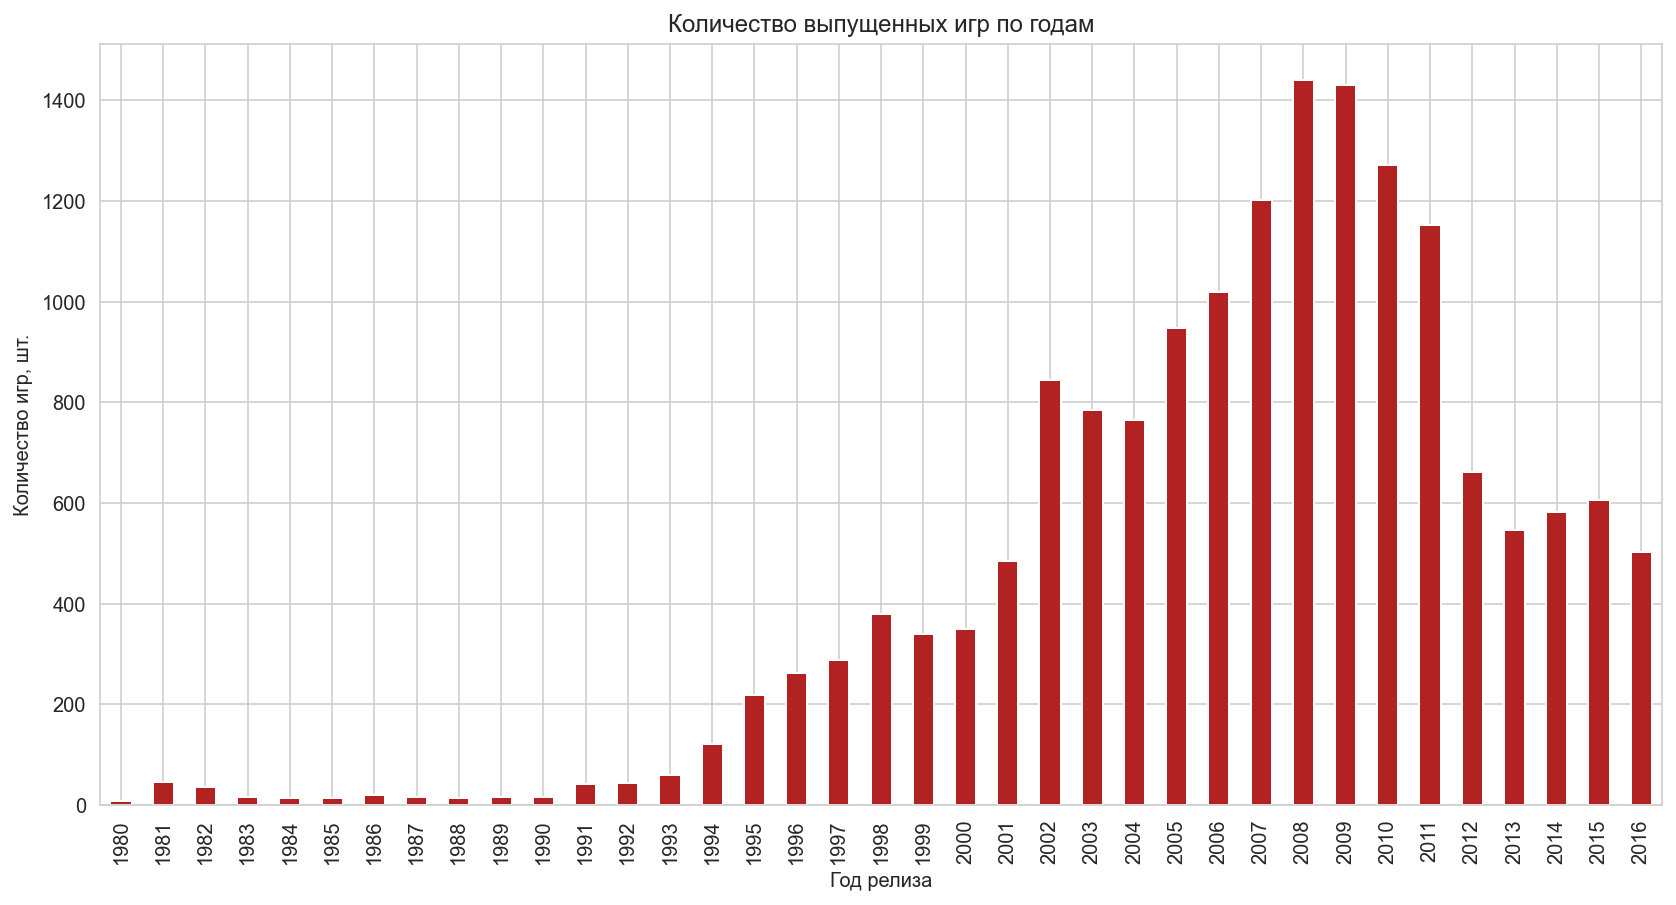

In [30]:
# Построим гистограмму для визуальной оценки количества релизов игр по годам
(
    df_games
    .query('year_of_release != 0')
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', title='Количество выпущенных игр по годам', grid=True, color='firebrick', legend=False, figsize=(14,7))
)
plt.xlabel('Год релиза')
plt.ylabel('Количество игр, шт.')
plt.show()

#### Вывод:
На гистограмме хорошо заметно, что начиная с 1995 года начинается рост количества выпускаеммых игр. Больше всего новых игр было выпущено в 2008 и 2009 годах. Данные до 1995 года малоинформативны для анализа.

### <a name="games_sales_per_platform"></a> Количество проданных игр для каждой платформы

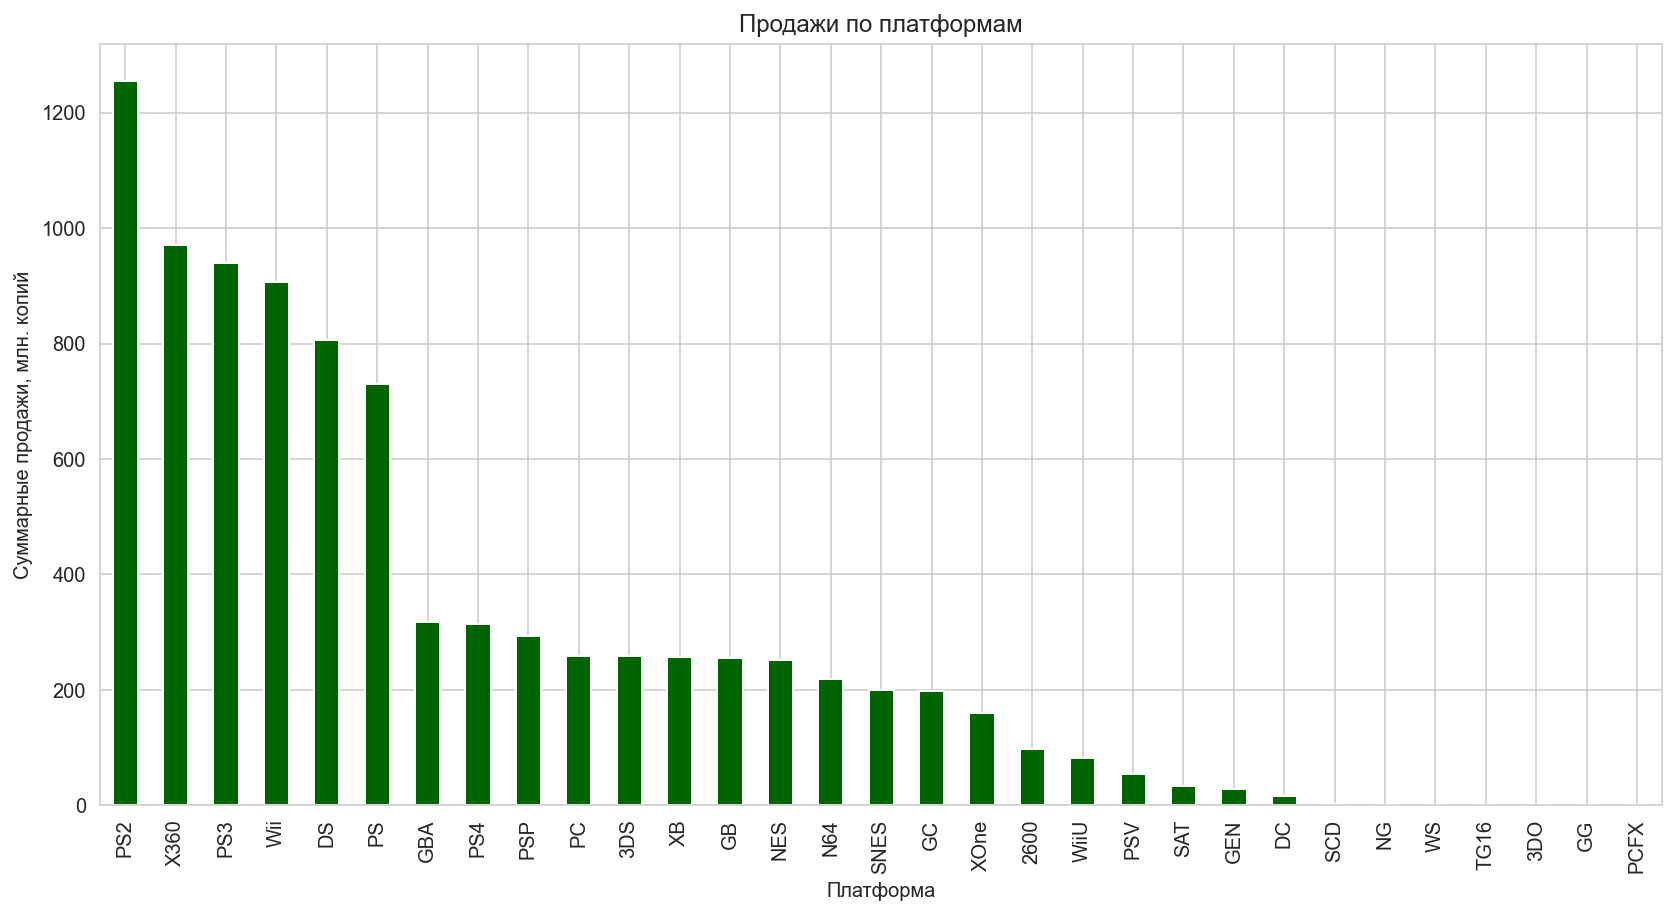

In [31]:
# Построим гистограмму для визуальной оценки продаж по разным игровым платформам
(
    df_games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', title='Продажи по платформам', grid=True, color='darkgreen', legend=False, figsize=(14,7))
)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

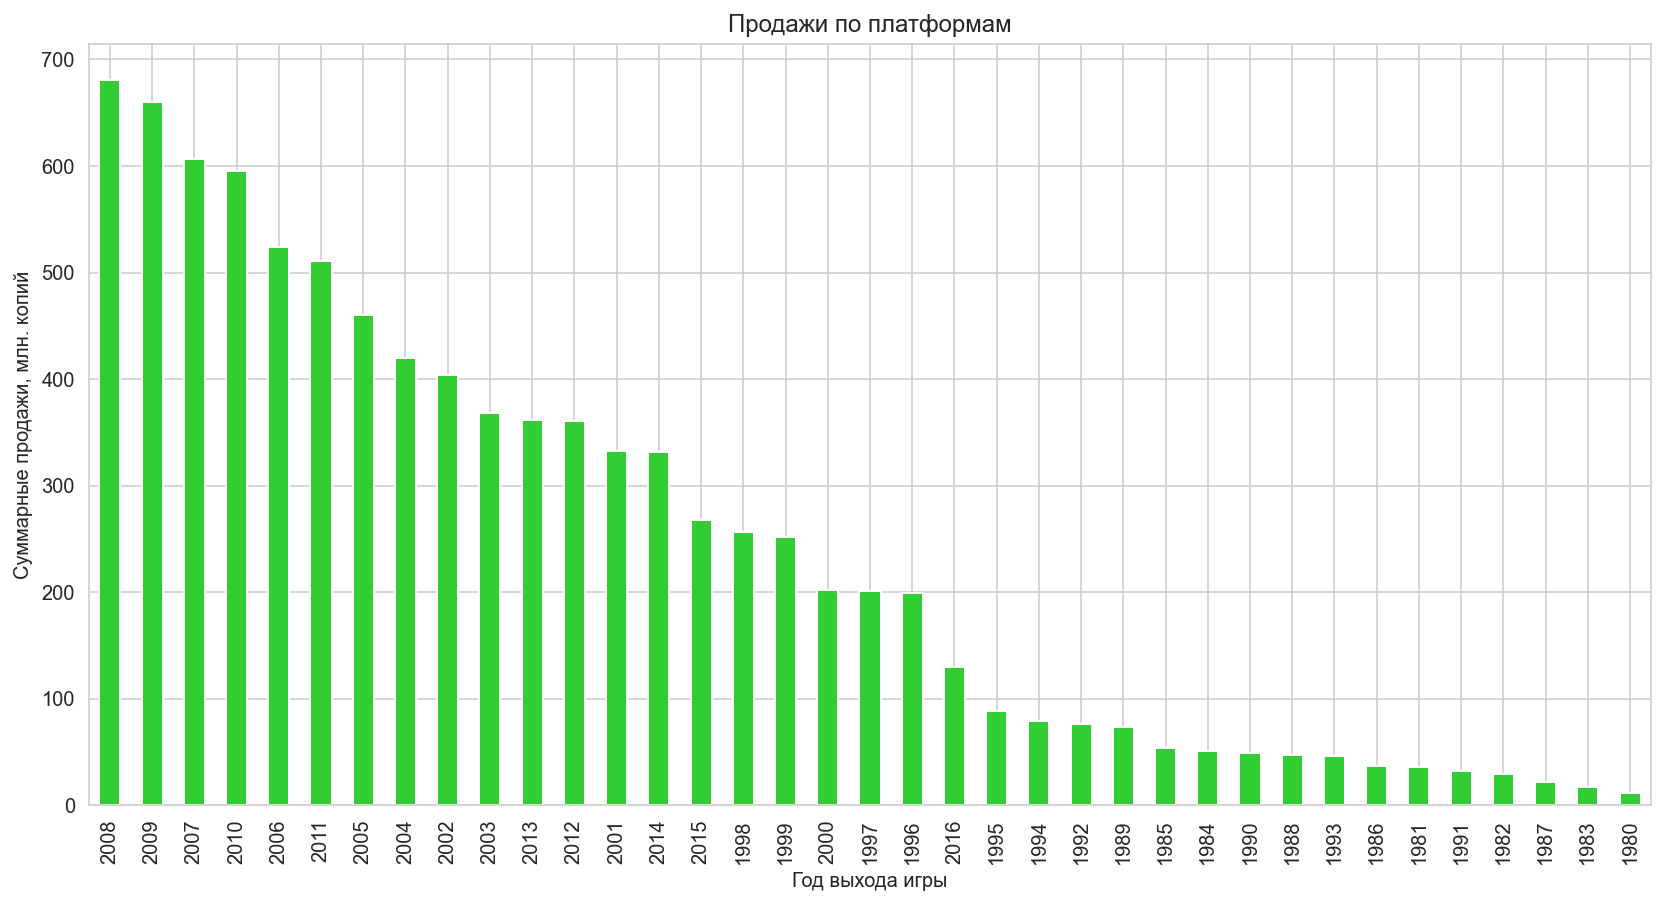

In [32]:
# Построим гистограмму для визуальной оценки продаж по годам
(
    df_games
    .query('year_of_release != 0')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', title='Продажи по платформам', grid=True, color='limegreen', legend=False, figsize=(14,7))
)
plt.xlabel('Год выхода игры')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

#### <a name="top10_platform"></a> Найдем 10 платформ с самыми высокими суммарными продажами за все годы

In [33]:
# Сгруппируем исходные данные по годам
df_games_grouped = (
    df_games
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .fillna(0)
)

In [34]:
top10_platforms = (df_games
                   .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                   .sort_values(by='total_sales', ascending=False)
                   .head(10)
)

# 10 платформ с самыми высокими суммарными продажами
top10_platforms

,total_sales
platform,
PS2,"1,255.77"
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


#### По объёму продаж лидируют Sony PlayStation, Xbox, Wii и портативные консоли DS и PS.

#### Посмотрим, как менялись продажи игр для консолей из списка ТОП-10 по годам.

In [35]:
df_games_grouped.query('year_of_release >= 1995')[top10_platforms.index]

platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC
year_of_release,,,,,,,,,,
1995,0.00,0.00,0.00,0.00,0.00,35.96,0.00,0.00,0.00,4.22
1996,0.00,0.00,0.00,0.00,0.00,94.70,0.00,0.00,0.00,10.58
1997,0.00,0.00,0.00,0.00,0.00,136.17,0.00,0.00,0.00,11.27
1998,0.00,0.00,0.00,0.00,0.00,169.49,0.00,0.00,0.00,3.26
1999,0.00,0.00,0.00,0.00,0.00,144.53,0.00,0.00,0.00,4.74
2000,39.17,0.00,0.00,0.00,0.00,96.37,0.07,0.00,0.00,4.66
2001,166.43,0.00,0.00,0.00,0.00,35.59,61.53,0.00,0.00,5.47
2002,208.36,0.00,0.00,0.00,0.00,6.67,74.16,0.00,0.00,8.57
2003,193.05,0.00,0.00,0.00,0.00,2.07,56.67,0.00,0.00,8.89


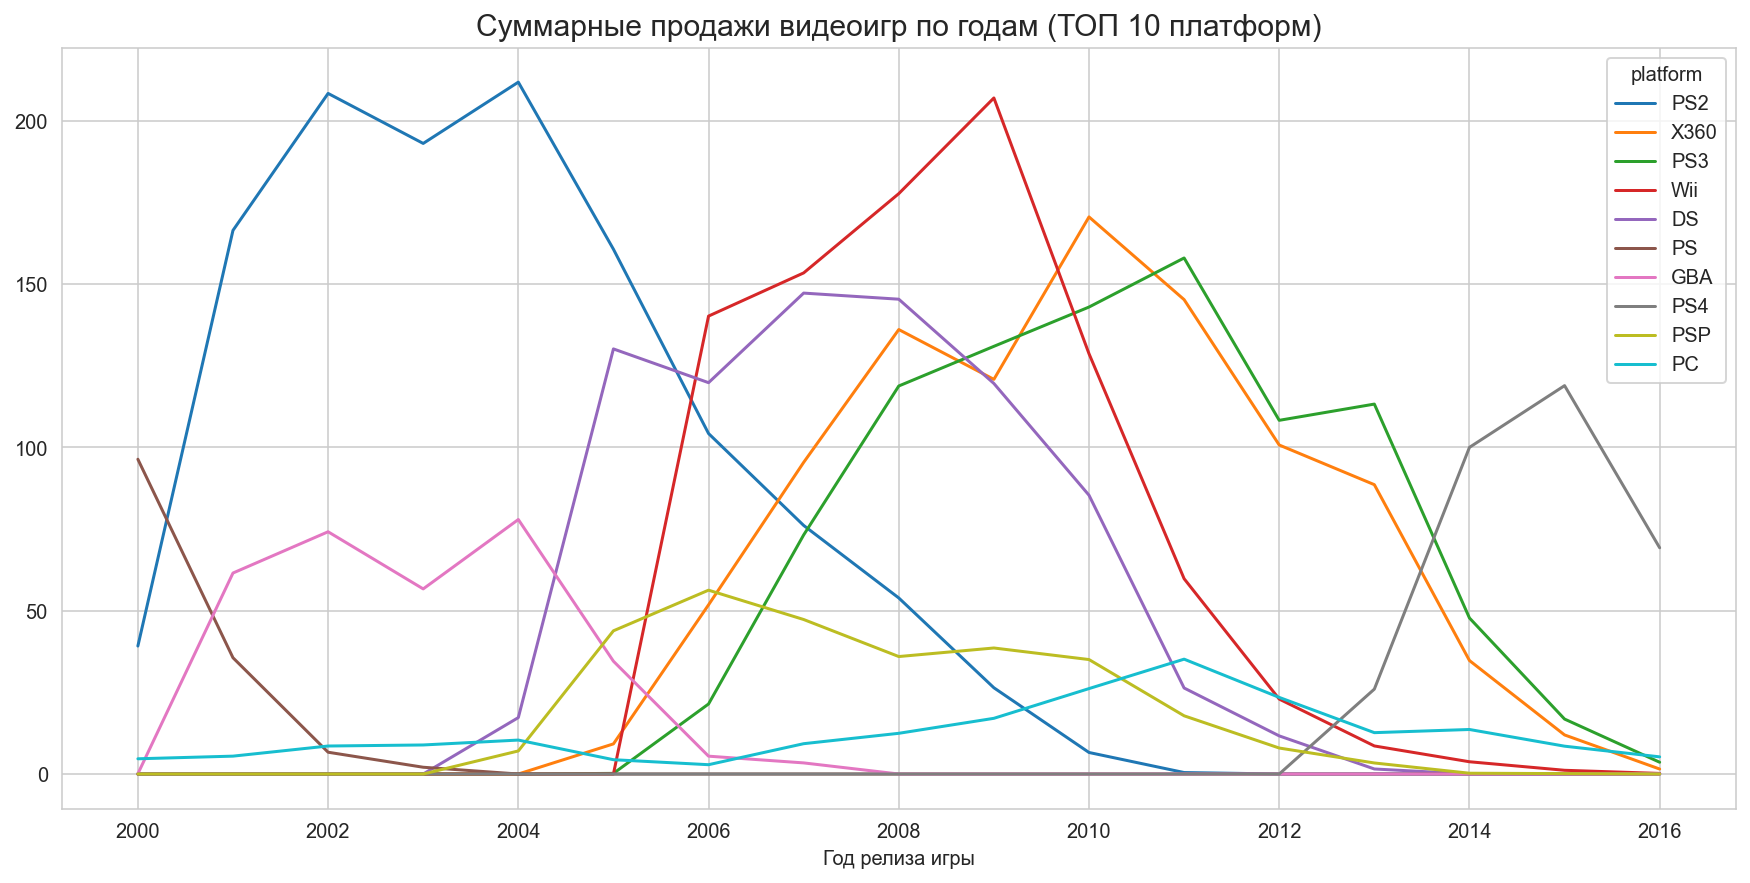

In [36]:
# Построим график
(
    df_games_grouped
    [top10_platforms.index]
    .query('year_of_release >= 2000')  # До 2000 года практически отсутсвуют продажи, кроме как у PlayStation 1 и PC
    .plot(figsize=(15,7))
)
plt.title('Суммарные продажи видеоигр по годам (ТОП 10 платформ)', fontsize=15)
plt.xlabel("Год релиза игры")
plt.show()

#### На графике мы можем видеть, что продажи для каждой платформы распределены не равномерно - сначала достаточно резкий рост, потом не менее резкий спад.

#### <a name="platform_actual_period"></a> Найдем характерный "срок жизни" для игровых платформ.

##### Чтобы понять, сколько лет существует игровая платформа, найдем количество лет, в течение которых для каждой платфорвы выпускали игры.

In [37]:
# Создадим список для хранения количества лет, в течение которых были продажи, для каждой платформы
sales_year_count = []

# Цикл по всем столбцам датафрейма для подсчета количества лет, в течение которых были продажи
for column in df_games_grouped.columns:
    # Посчитать количество True и False, где продажи в столбце с названием платформы не равны 0
    sales_year_count.append(df_games_grouped[column]
                            .ne(0)  # not equal
                            .value_counts()  # Количество значений (True и False)
                            .loc[df_games_grouped[column]  # Обратимся к индексу с помощью метода loc
                            .ne(0)
                            .value_counts().index == True]  # Только строки, где продажи не равны 0
                            .values[0])  # Только числовое значение

In [38]:
# Преобразуем список в объект Series
sales_year_count = pd.Series(sales_year_count)

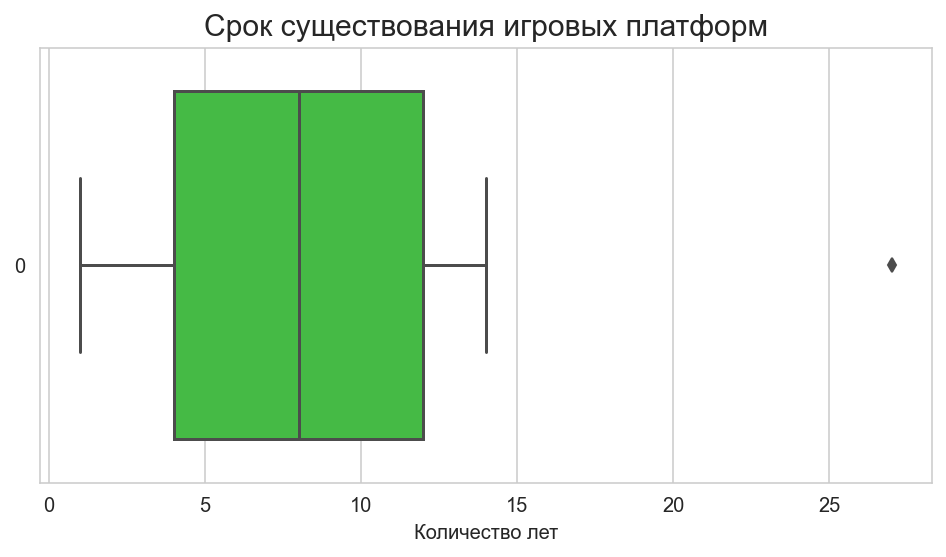

In [39]:
# Построим ящик с усами, чтобы оценить распределение времени существования игровых платформ
plt.figure(figsize=(8,4))
plt.title('Срок существования игровых платформ', fontsize=15)
sb.boxplot(data=sales_year_count, orient='h', color='limegreen')
plt.xlabel('Количество лет')
plt.show()

In [40]:
# Посмотрим на статистики
sales_year_count.describe()

count   31.00
mean     8.32
std      5.46
min      1.00
25%      4.00
50%      8.00
75%     12.00
max     27.00
dtype: float64

#### Вывод:
1. Самые высокие продажи игр у платформ Sony PlayStation, Xbox, Wii и портативных консолей DS.
2. В 2008 и 2009 годах не только выпускали больше всего игр, выпущенные игры отлично продавались.
3. Средний срок "жизни" игровой платформы - 8 лет. Данный показатель в большей степени относится к игровым консолям, нежели к играм для PC.
4. Принимая во внимание рассмотренные данные, в качестве актуального для анализа периода следует рассматривать <b>период с 2012 по 2016 годы</b>.

[Вернуться к оглавлению](#table_of_contents)

### <a name="games_sales_actual_period"></a> Анализ продаж за выбранный актуальный период

#### Создадим новый датафрейм с продажами за актуальный период.

In [41]:
# Выберем продажи за 2012-2016 годы
df_actual = df_games.query('year_of_release >=2012')

# Новый набор данных
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,rating_dec
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97,82,M,Mature
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97,81,M,Mature
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,101,101,RP,Rating Pending
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,101,101,RP,Rating Pending
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83,53,M,Mature
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,101,101,RP,Rating Pending
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.01,101,101,RP,Rating Pending
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,101,101,RP,Rating Pending
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,101,101,RP,Rating Pending


In [42]:
# Сгруппируем данные за актуальный период по годам
df_actual_grouped = (
    df_actual
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)

df_actual_grouped

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.76,11.67,23.45,108.28,nan,7.95,16.19,22.94,17.56,100.72,nan
2013,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,nan,13.63,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,nan,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,nan,5.25,3.60,69.25,nan,4.25,0.18,4.60,1.52,26.15


##### Не у всех платформ есть продажи за актуальный период. Найдём только те платформы, где были продажи.

In [43]:
platform_actual = []

for column in df_actual_grouped.columns:
    
    # По части платформ возвращаются пустые списки т.к. за период 2012 - 2016 нет продаж. Поэтому нужна обработка исключений.
    try:
        actual_sales = (df_actual_grouped[column]
                                .ne(0)  # not equal
                                .value_counts()  # Количество значений (True и False)
                                .loc[df_actual_grouped[column]  # Обратимся к индексу с помощью метода loc
                                .ne(0)
                                .value_counts().index == True]
                                .values[0])  # Только числовое значение
    except IndexError:
        actual_sales = 0
    
    # Выберем только те платформы, где были продажи как минимум за 4 года актуального периода
    if actual_sales >= 4:
        platform_actual.append(column)

In [44]:
# Список платформ, по которым были продажи за актуальный период
platform_actual

['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

##### Для целей анализа нам интересны только перспективные платформы, поэтому исключил из датасета платформы с низкими продажами.

In [45]:
# Удалим из датафрейма df_actual платформы без продаж.
df_actual_grouped = df_actual_grouped[platform_actual]

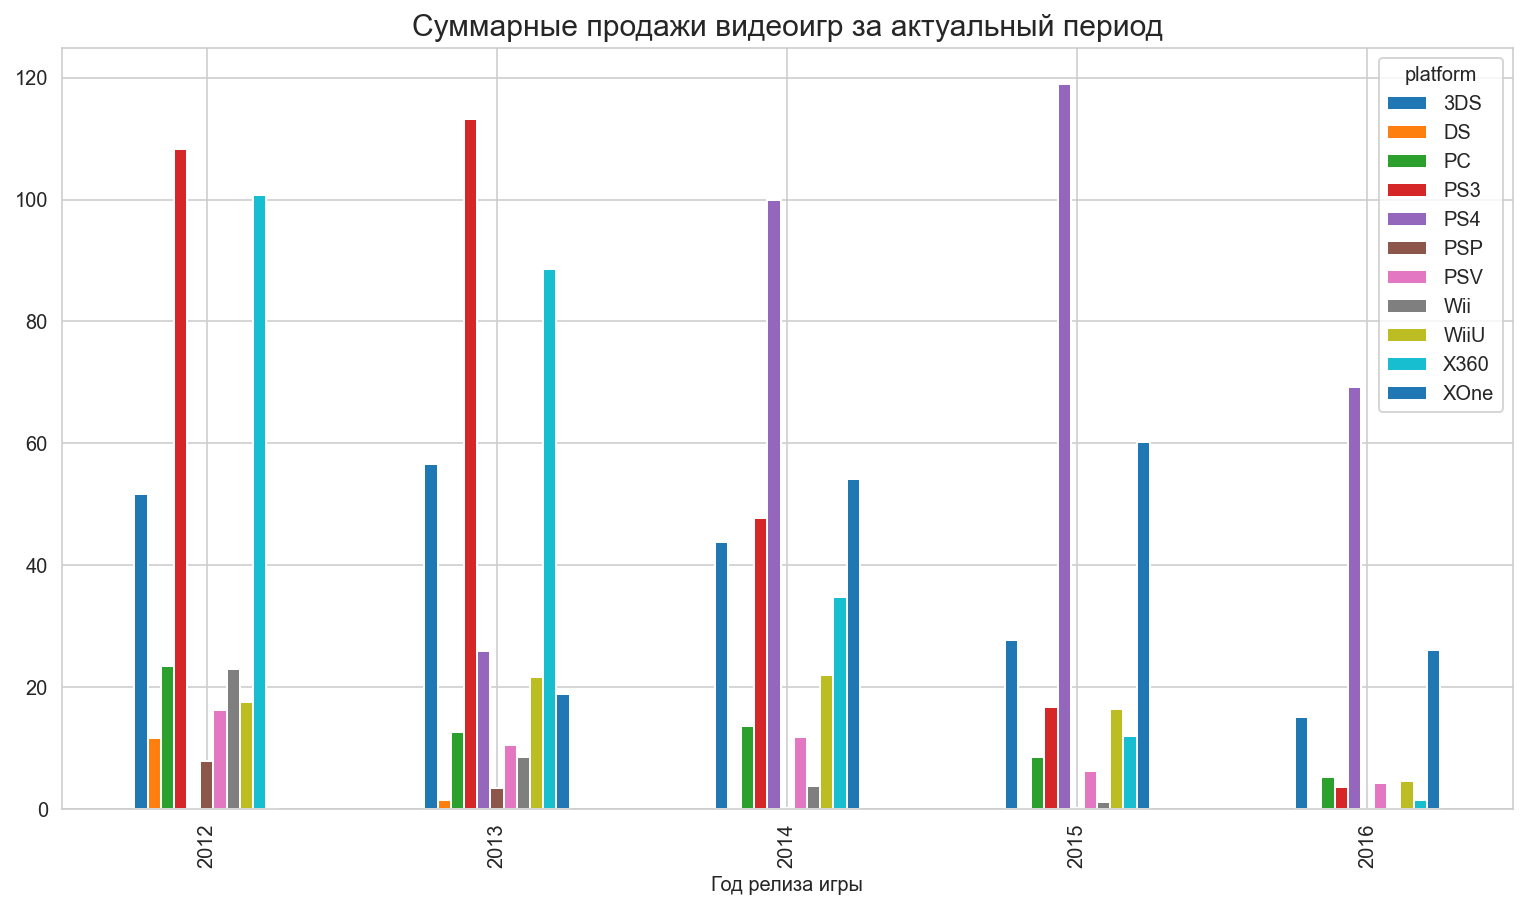

In [46]:
(
    df_actual_grouped
    .plot(kind='bar', figsize=(13,7))
)
plt.title('Суммарные продажи видеоигр за актуальный период', fontsize=15)
plt.xlabel("Год релиза игры")
plt.show()

In [47]:
# Продажи платформ
(
    df_actual
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
    .reset_index()
)

,platform,total_sales
0,PS4,314.14
1,PS3,289.71
2,X360,237.52
3,3DS,195.01
4,XOne,159.32
5,WiiU,82.19
6,PC,63.51
7,PSV,49.18
8,Wii,36.60
9,DS,13.21


#### На графике мы можем видеть, что в актуальном периоде наблюдается рост продаж игр для платформ PS4 и XOne, в тоже время снижаются продажи PS3, X360 и 3DS. Посмотрим на эти 5 платформ более подробно.

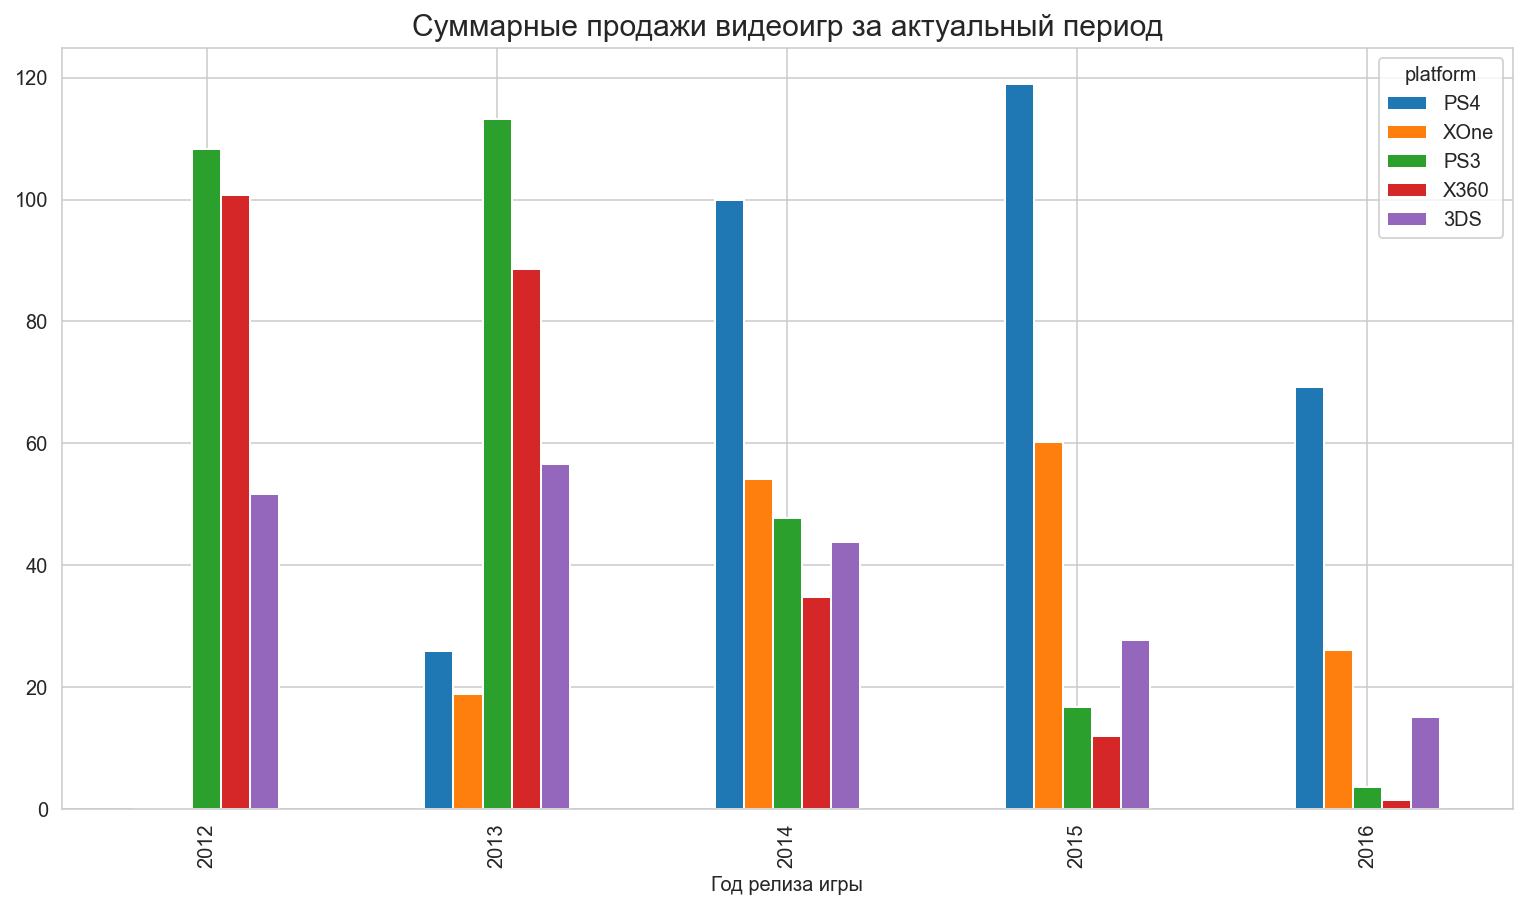

In [48]:
# График по 5 платформам с наибольшими продажами в актуальном периоде
(
    df_actual_grouped
    [['PS4', 'XOne', 'PS3', 'X360', '3DS']]
    .plot(kind='bar', figsize=(13,7))
)
plt.title('Суммарные продажи видеоигр за актуальный период', fontsize=15)
plt.xlabel("Год релиза игры")
plt.show()

In [49]:
# Продажи платформ
top5_actual_platform = ['PS4', 'XOne', 'PS3', 'X360', '3DS']
(
    df_actual
    .query('platform in @top5_actual_platform')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
    .reset_index()
)

,platform,total_sales
0,PS4,314.14
1,PS3,289.71
2,X360,237.52
3,3DS,195.01
4,XOne,159.32


#### С 2013 года продажи игр для платформ PS4 и XOne неизменно опережают другие платформы. Это связано с тем, что эти платформы пришли на смену устаревшим PS3 и X360. Что касается 3DS, можно предположить, что продажи игр для портативных консолей снижаются по мере развития игр для смартфонов.

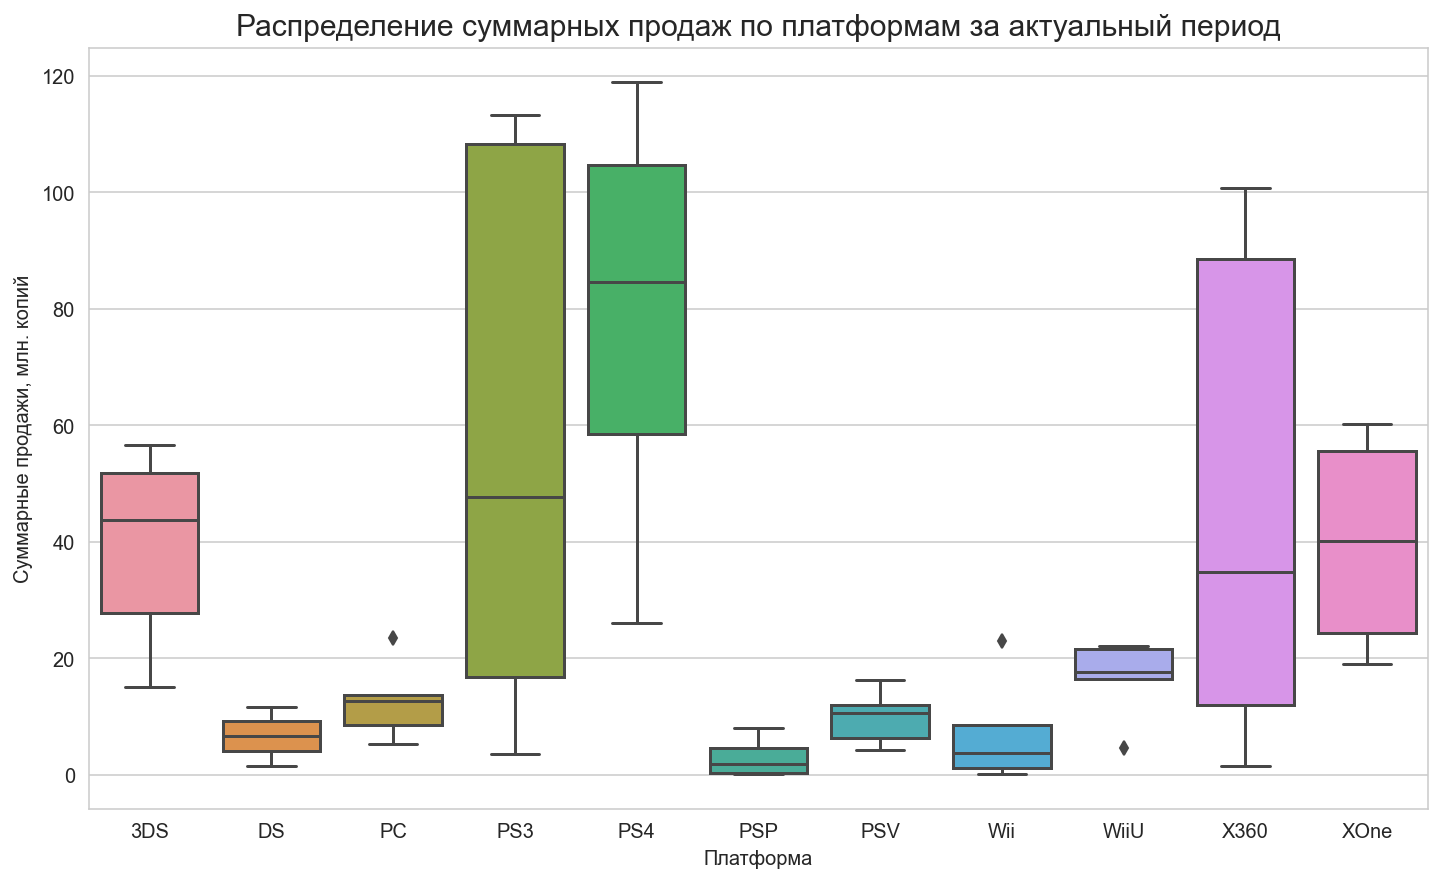

In [50]:
# Построим диаграмму "ящик с усами" для всех платформ за актуальный период
plt.figure(figsize=(12,7))
plt.title('Распределение суммарных продаж по платформам за актуальный период', fontsize=15)
palette = sb.set_palette('pastel', n_colors=5)
sb.boxplot(data=df_actual_grouped, orient='v', palette=palette)
plt.ylabel('Суммарные продажи, млн. копий')
plt.xlabel('Платформа')
plt.show()

#### Самые высокие продажи у игровых платформ Sony. У PS4 более высокие средние продажи, но PS3 выше продажи в целом. Это связано с тем, что в предоставленной выборке больше данных по PS3, в то время как PS4 новая платформа относительно предоставленных данных. 

#### Вывод:
1. За актуальный период (2012-2016 годы) продавались игры для следующих платформ: '3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'
2. Среди этих платформ выделяются 5 с наиболее высокими продажами: '3DS', 'PS3', 'PS4', 'X360', 'XOne'.
3. Проведя анализ продаж за актуальный период, можно сделать вывод о том, что основную долю игрового рынка составляют платформы семейств PlayStation и Xbox.

[Вернуться к оглавлению](#table_of_contents)

### <a name="score_influence"></a> Влияние оценок пользователей и критиков на продажи

#### Посмотрим, как влияют оценки пользователей и критиков на продажи на примере платформы PS4, как самой популярной в 2016 году.

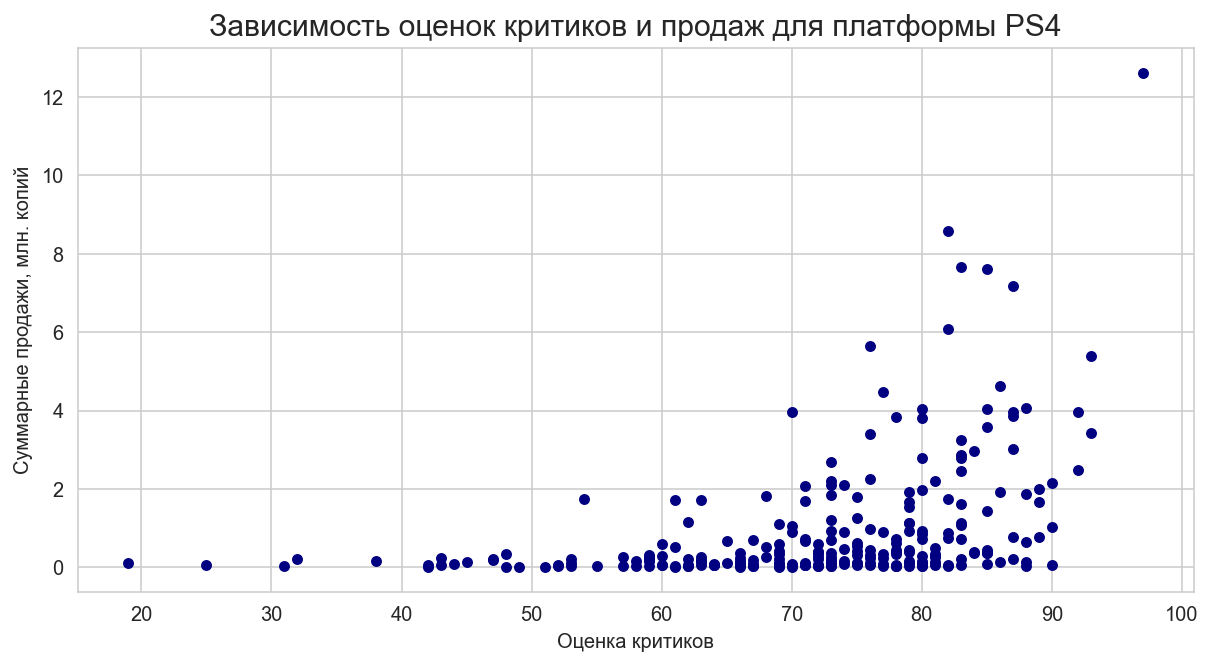

In [51]:
# Диаграмма рассеяния для оценок критиков
(
    df_actual
    .query('platform == "PS4" and critic_score != 101')
    .plot(kind='scatter', x='critic_score', y='total_sales', grid=True, color='navy', figsize=(10,5))
)
plt.title('Зависимость оценок критиков и продаж для платформы PS4', fontsize=15)
plt.ylabel('Суммарные продажи, млн. копий')
plt.xlabel('Оценка критиков')
plt.show()

In [52]:
# Найдем коэффициент корреляции
critic_score_corr = (df_actual
                     .query('platform == "PS4" and critic_score != 101')['total_sales']
                     .corr(df_actual.query('platform == "PS4" and critic_score != 101')['critic_score']))
print('Коэффициент корреляции Пирсона (суммарные продажи и оценки критиков) для платформы PS4:', round(critic_score_corr, 2))

Коэффициент корреляции Пирсона (суммарные продажи и оценки критиков) для платформы PS4: 0.41


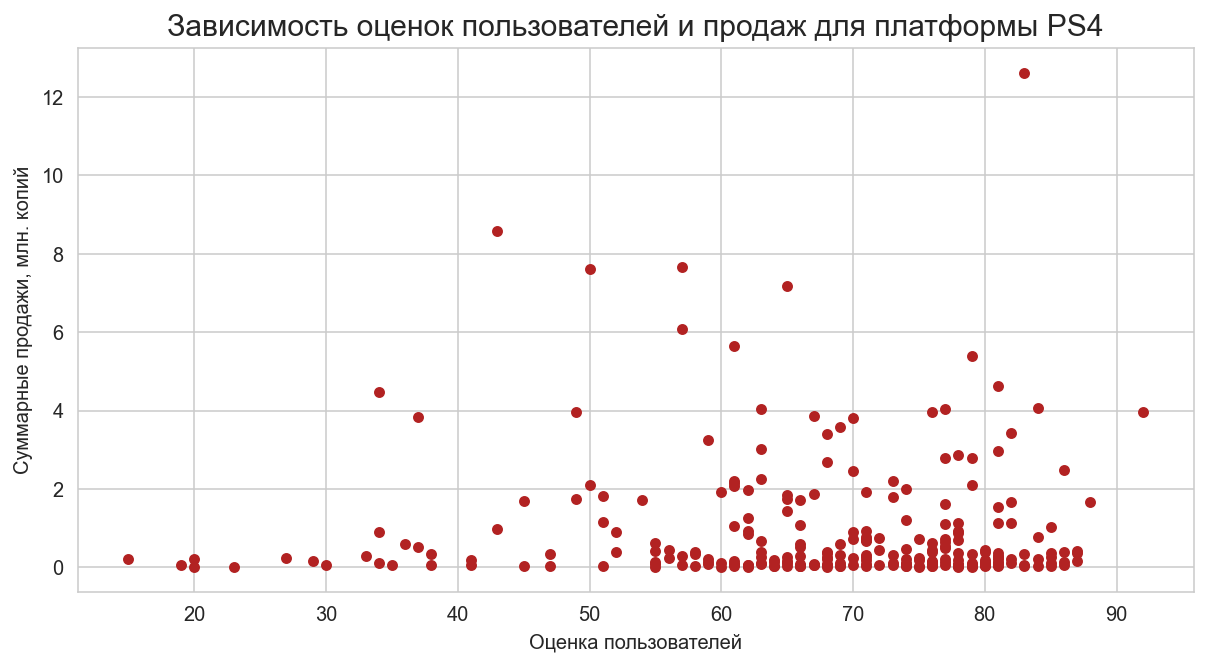

In [53]:
# Диаграмма рассеяния для оценок пользователей
(
    df_actual
    .query('platform == "PS4" and user_score != 101')
    .plot(kind='scatter', x='user_score', y='total_sales', grid=True, color='firebrick', figsize=(10,5))
)
plt.title('Зависимость оценок пользователей и продаж для платформы PS4', fontsize=15)
plt.ylabel('Суммарные продажи, млн. копий')
plt.xlabel('Оценка пользователей')
plt.show()

In [54]:
# Найдем коэффициент корреляции
users_score_corr = (df_actual
                     .query('platform == "PS4" and user_score != 101')['total_sales']
                     .corr(df_actual.query('platform == "PS4" and user_score != 101')['user_score']))
print('Коэффициент корреляции Пирсона (суммарные продажи и оценки пользователей) для платформы PS4:', 
      round(users_score_corr, 2))

Коэффициент корреляции Пирсона (суммарные продажи и оценки пользователей) для платформы PS4: -0.03


#### Найдем средние оценки критиков и пользователей для платформы PS4.

In [55]:
(
    df_actual
    .query('platform == "PS4" and critic_score != 101 and user_score != 101')
    .pivot_table(index='platform', values=['critic_score', 'user_score'], aggfunc=['min', 'max', 'mean'])
)

min                     max                    mean  \
         critic_score user_score critic_score user_score critic_score   
platform                                                                
PS4                19         15           97         92        72.13   

                     
         user_score  
platform             
PS4           67.50

#### Вывод:
1. Оценки критиков оказывают значительное влияние на продажи игр для платформы в PS4. На диаграмме рассеяния мы можем видеть, что чем выше оценка критиков, тем больше суммарные продажи. Это также подтверждается коэффициентом корреляции, равным 0.41, что говорит о положительной связи между оценками критиков и продажами. Средняя оценка критиков для платформы PS4 составляет 72, минимальная и максимальная оценка 19 и 97 соответственно.
2. Оценки пользователей не оказывают влияния на продажи игр для платформы PS4. На диаграмме рассеяния мы можем видеть, что продажи распределены независимо от оценок пользователей. Коэффициент корреляции, равный -0.03 близок к 0, что говорит об отсутствии связи между оценками пользователей и продажами.  Средняя оценка пользователей для платформы PS4 составляет 67, минимальная и максимальная оценка 15 и 92 соответственно.
3. При выставлении оценок для игр платформы PS4 критики в целом выставляют более высокие оценки, чем пользователи.

#### Посмотрим на зависимости для других платформ

##### Напишем функцию, чтобы автоматизировать построение диаграмм для других платформ

In [56]:
def paint_scatter(columns, colors):
    """
    Диаграмма для создания диаграмм рассеяния для каждого столбца
    """
    
    for column in columns:
        # Построить диаграмму рассеяния для оценок критиков
        (
            df_actual
            .query('platform == @column and critic_score != 101')
            .plot(kind='scatter', x='critic_score', y='total_sales', grid=True, color=colors[column], figsize=(10,5))
        )
        plt.title('Зависимость оценок критиков и продаж для платформы {}'.format(column), fontsize=15)
        plt.ylabel('Суммарные продажи, млн. копий')
        plt.xlabel('Оценка критиков')
        plt.show()
        
        # Найти коэффициент корреляции между суммарными продажами и оценками критиков
        critic_score_corr = (df_actual
                     .query('platform == @column and critic_score != 101')['total_sales']
                     .corr(df_actual.query('platform == @column and critic_score != 101')['critic_score']))
        print('Коэффициент корреляции Пирсона (суммарные продажи и оценки критиков) для платформы {}:'.format(column), 
              round(critic_score_corr, 2))
        
        
        # Построить диаграмму рассеяния для оценок пользоветелей
        (
            df_actual
            .query('platform == @column and user_score != 101')
            .plot(kind='scatter', x='user_score', y='total_sales', grid=True, color=colors[column], figsize=(10,5))
        )
        plt.title('Зависимость оценок пользователей и продаж для платформы {}'.format(column), fontsize=15)
        plt.ylabel('Суммарные продажи, млн. копий')
        plt.xlabel('Оценка пользователей')
        plt.show()
        
        # Найти коэффициент корреляции между суммарными продажами и оценками пользователей
        users_score_corr = (df_actual
                     .query('platform == @column and user_score != 101')['total_sales']
                     .corr(df_actual.query('platform == @column and user_score != 101')['user_score']))
        print('Коэффициент корреляции Пирсона (суммарные продажи и оценки пользователей) для платформы {}:'.format(column), 
              round(users_score_corr, 2))

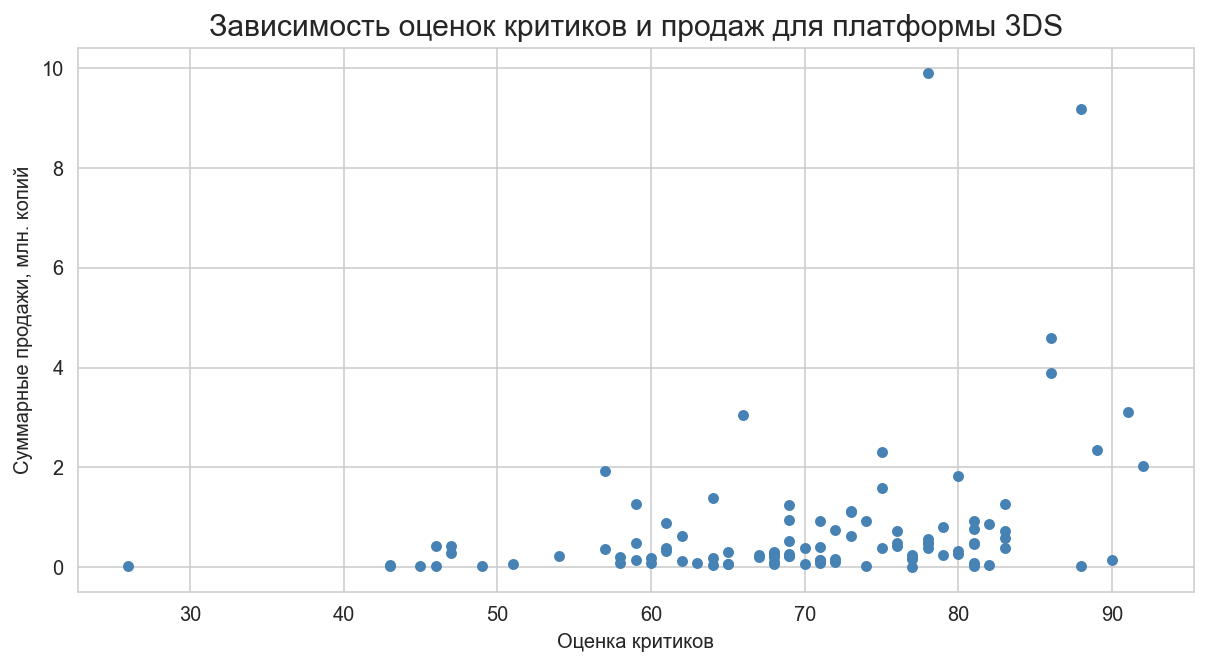

Коэффициент корреляции Пирсона (суммарные продажи и оценки критиков) для платформы 3DS: 0.32


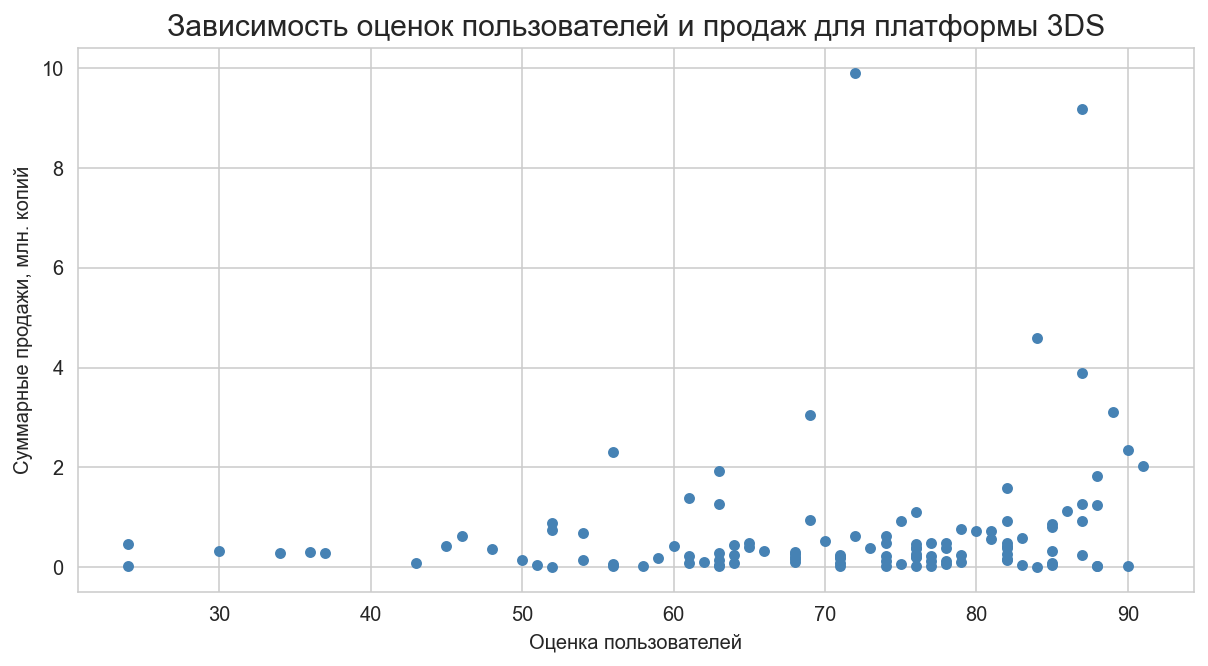

Коэффициент корреляции Пирсона (суммарные продажи и оценки пользователей) для платформы 3DS: 0.2


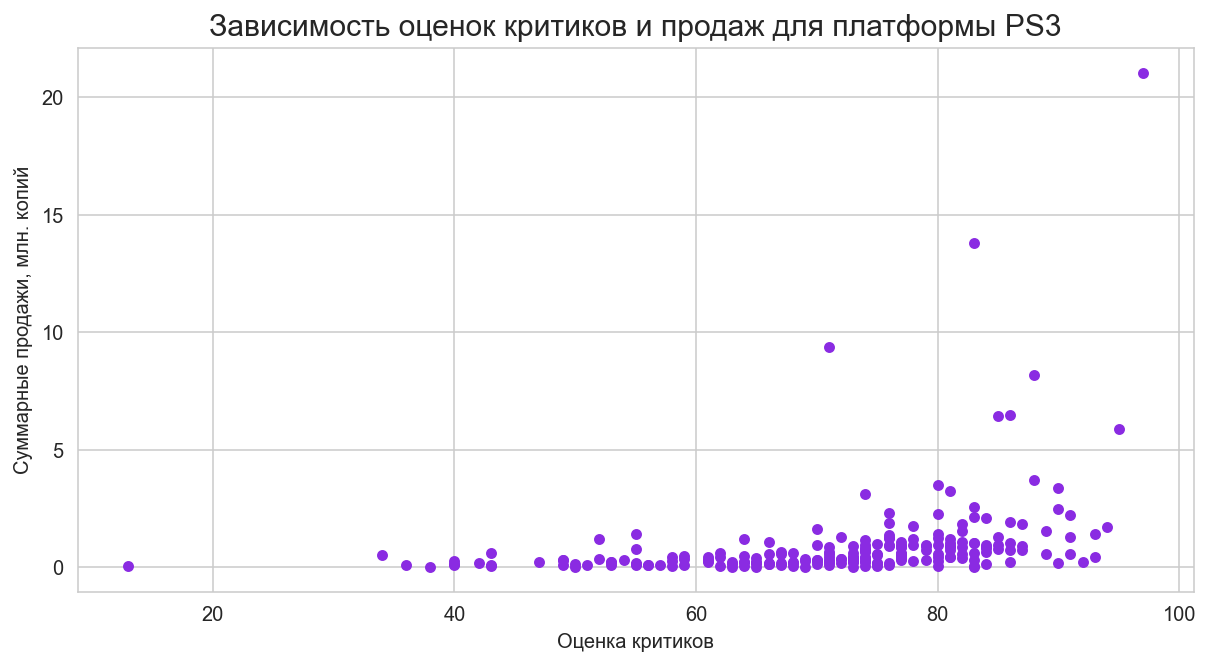

Коэффициент корреляции Пирсона (суммарные продажи и оценки критиков) для платформы PS3: 0.33


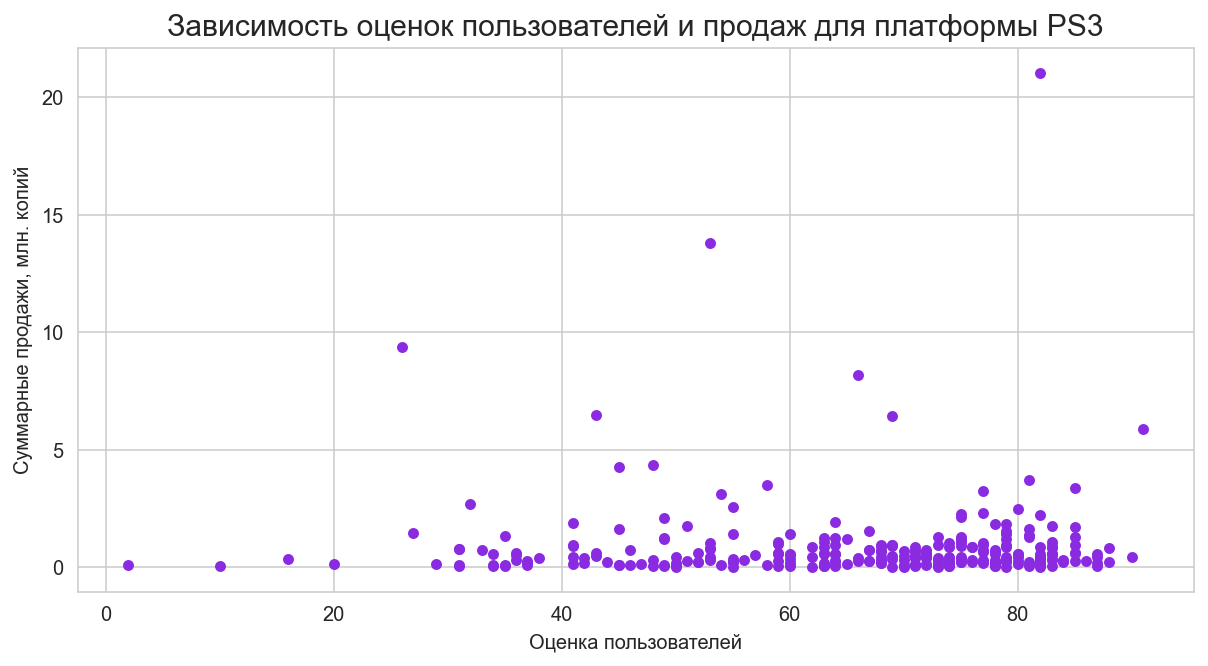

Коэффициент корреляции Пирсона (суммарные продажи и оценки пользователей) для платформы PS3: -0.01


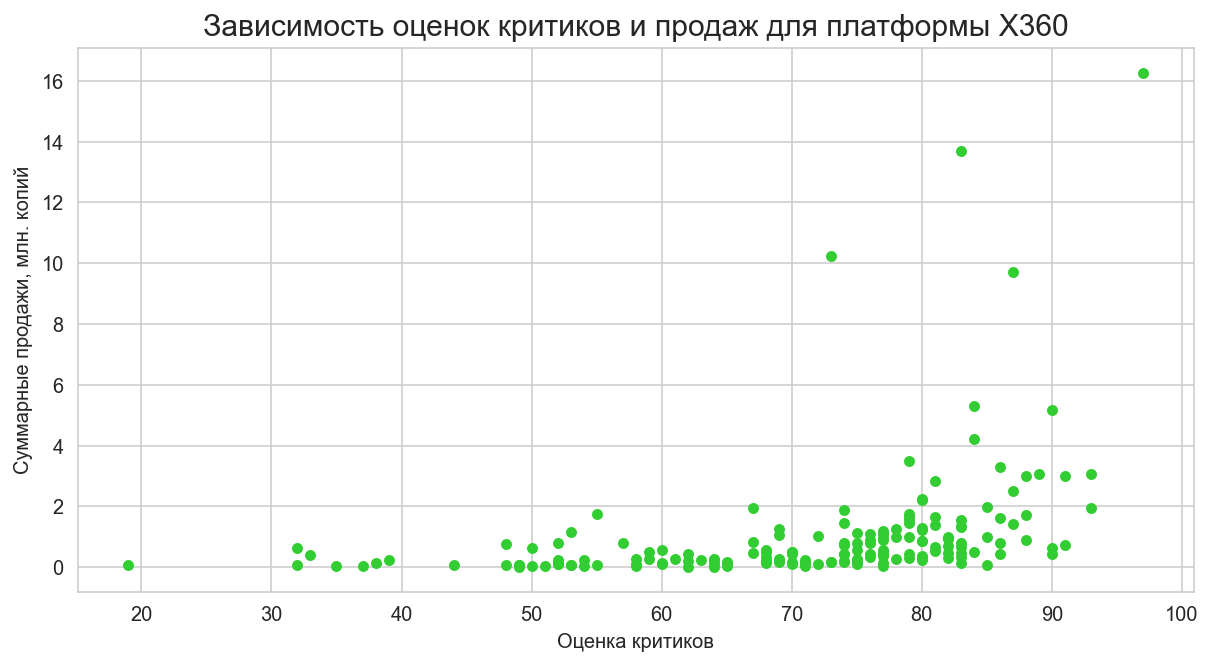

Коэффициент корреляции Пирсона (суммарные продажи и оценки критиков) для платформы X360: 0.36


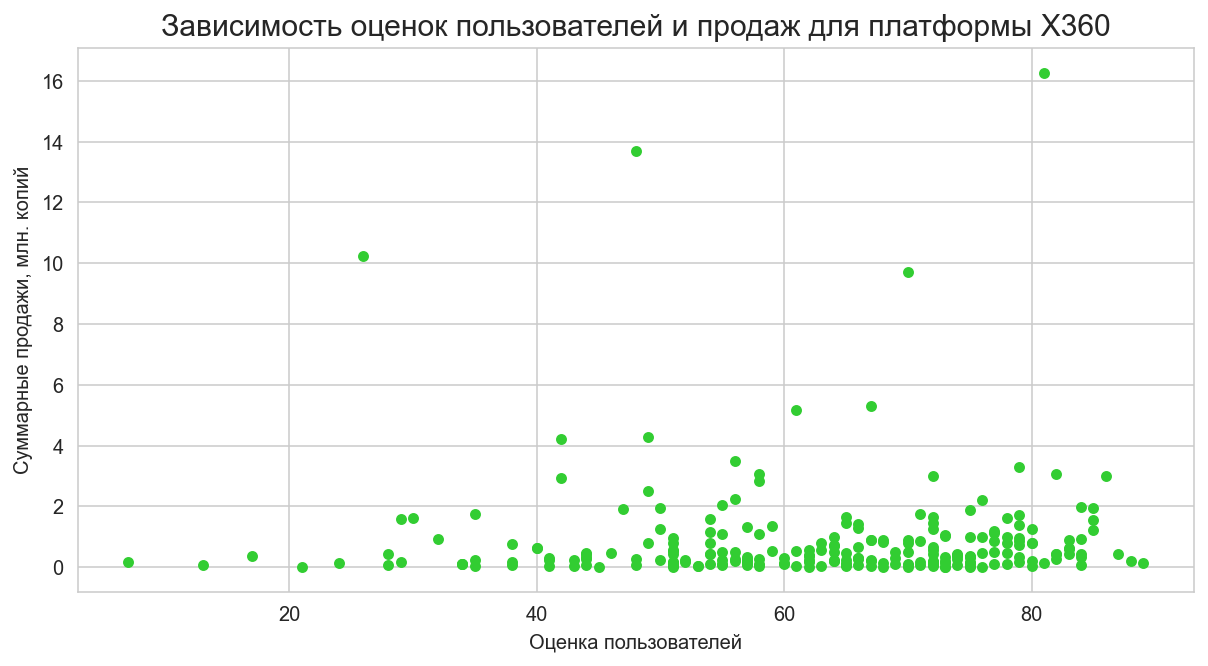

Коэффициент корреляции Пирсона (суммарные продажи и оценки пользователей) для платформы X360: 0.01


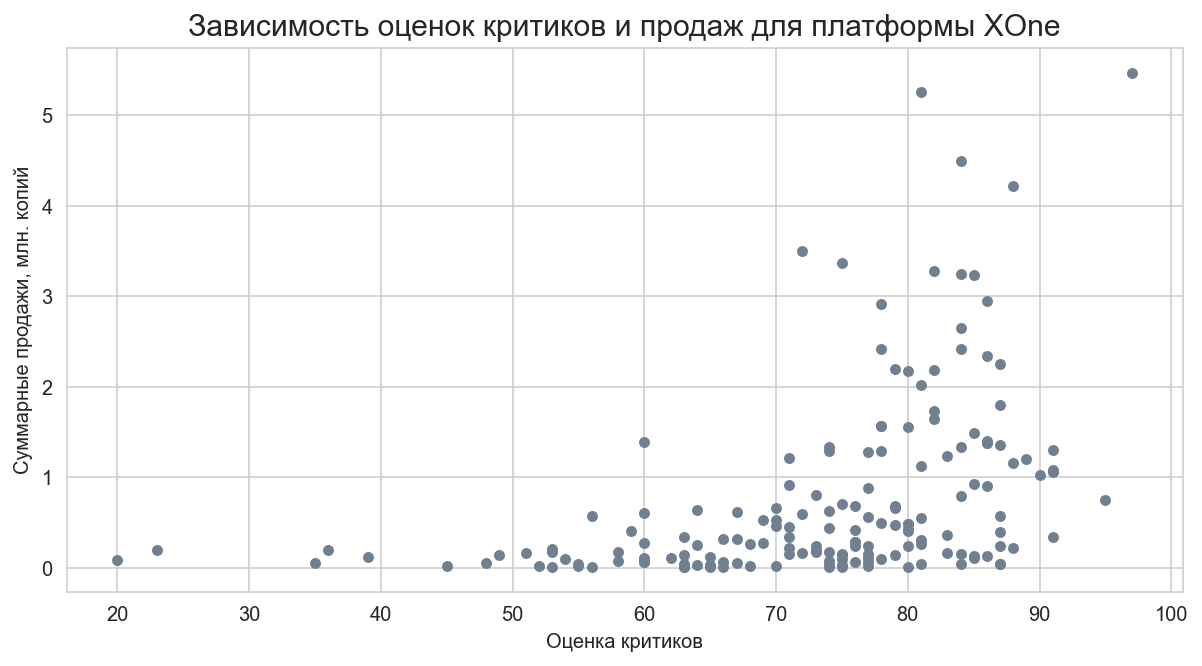

Коэффициент корреляции Пирсона (суммарные продажи и оценки критиков) для платформы XOne: 0.42


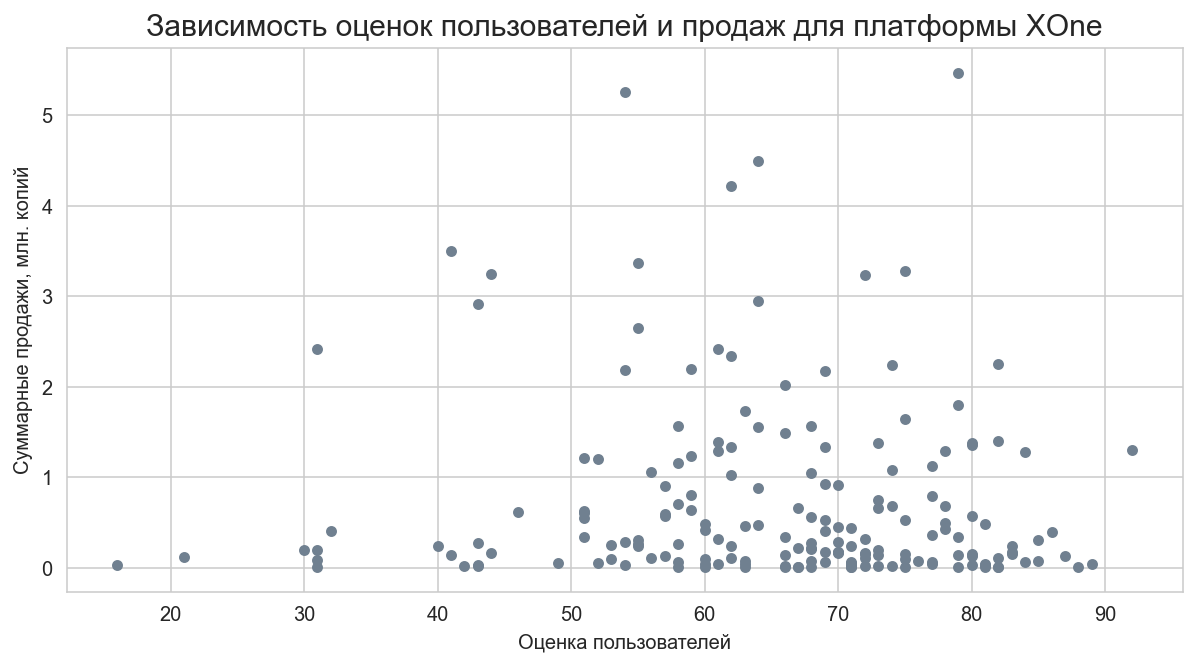

Коэффициент корреляции Пирсона (суммарные продажи и оценки пользователей) для платформы XOne: -0.07


In [57]:
# Список оставшихся 5 платформ с наиболее высокими продажами за актуальный период
other_platforms = ['3DS', 'PS3', 'X360', 'XOne']

# Разные цвета диаграмм для разных платформ
colors = {'3DS':'steelblue',
         'PS3':'blueviolet',
         'X360':'limegreen',
         'XOne':'slategrey'}

# Создадим диаграммы 
paint_scatter(other_platforms, colors)

In [58]:
(
    df_actual
    .query('critic_score != 101 and user_score != 101')
    .pivot_table(index='platform', values=['critic_score', 'user_score'], aggfunc=['min', 'max', 'mean'], margins=True)
)

min                     max                    mean  \
         critic_score user_score critic_score user_score critic_score   
platform                                                                
3DS                26         24           92         91        70.43   
DS                 80         82           80         82        80.00   
PC                 33         14           96         93        75.80   
PS3                13         10           97         91        71.74   
PS4                19         15           97         92        72.13   
PSP                74         83           74         83        74.00   
PSV                33         38           93         93        71.34   
Wii                73         60           82         88        76.17   
WiiU               24         27           93         91        70.67   
X360               19         13           97         89        70.91   
XOne               20         21           97         92        73.62   
All                13         10           97         93        72.39   

                     
         user_score  
platform             
3DS           71.88  
DS            82.00  
PC            64.71  
PS3           67.23  
PS4           67.50  
PSP           83.00  
PSV           76.02  
Wii           72.83  
WiiU          70.42  
X360          64.57  
XOne          65.38  
All           67.65

#### Вывод:
1. Для всех выбранных платформ оценки критиков оказывают на продажи большее влияние, чем оценки пользователей. Это может быть связано с тем, что покупатели больше доверяют мнению авторитетных игровых изданий, чем отзывам других пользователей. Также это может быть связано с тем, что рейтинг критиков публикуется раньше за счет предоставления промо-версий игр до старта продаж.
2. Средние оценки критиков для всех выбранных платформ выше, чем средние оценки пользователей. Предположу, что это связано с более строгими критериями оценки, которыми руководствуются критики игровых изданий.
3. Средние оценки пользователей и критиков:
    - Средняя оценка критиков для всех платформ - 72, пользователей - 67.
    - Минимальная оценка критиков для всех платформ - 13, пользователей - 10.
    - Максимальная оценка критиков для всех платформ - 97, пользователей - 93.
4. На основании средних оценок можно сделать вывод о том, что критики более лояльны при выставлении оценок независимо от платформы.

[Вернуться к оглавлению](#table_of_contents)

### <a name="game_genre"></a> Анализ игровых жанров

#### Посмотрим на суммарные продажи по жанрам за актуальный период

In [59]:
# Сгруппируем данные по жанрам
df_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,446.41
Shooter,304.75
Role-Playing,192.80
Sports,181.07
Misc,85.28
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


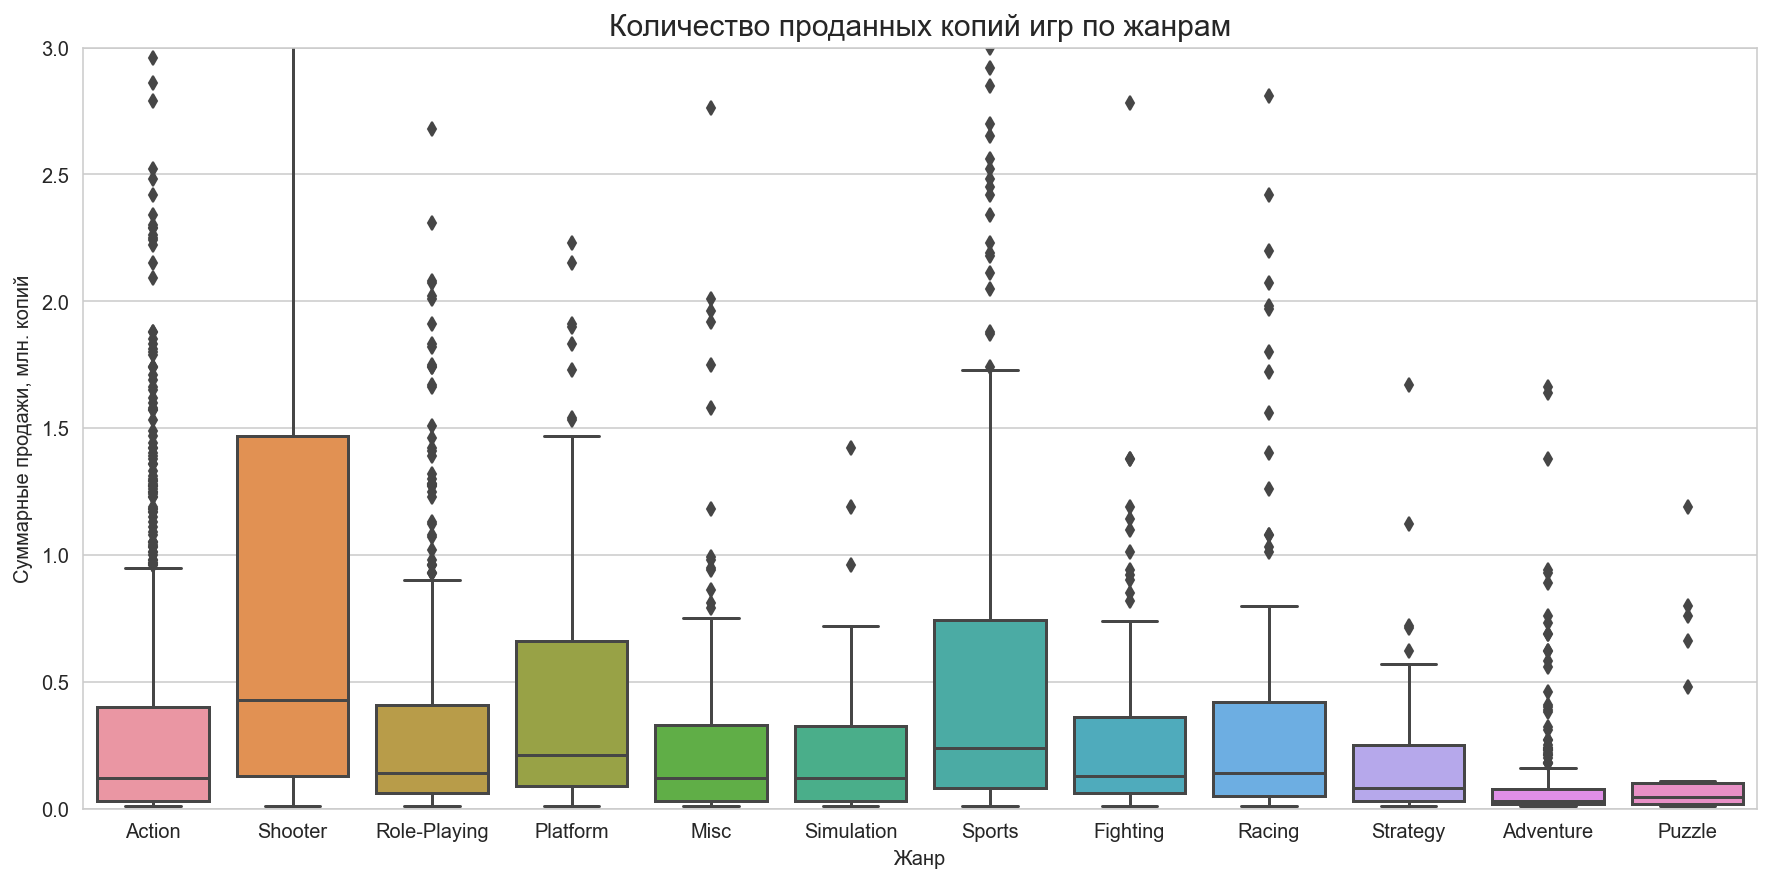

In [60]:
# Построим "ящики с усами" для каждого жанра, чтобы оценить распределение
plt.figure(figsize=(15,7))
plt.title('Количество проданных копий игр по жанрам', fontsize=15)
sb.boxplot(x='genre', y='total_sales', data=df_actual, orient='v')
plt.ylabel('Суммарные продажи, млн. копий')
plt.xlabel('Жанр')
plt.ylim(0,3)  # Снизим количество выбросов, отображаемых на графике
plt.show()

#### На графике распределений мы можем видеть, что самые высокие медианные продажи у жанров Shooter, Sports и Platform. С другой стороны, жанры Adventure и Puzzle имеют самые низкие продажи.

#### Найдем 10 самых продаваемых игр, их жанры и платформы

In [61]:
(
    df_actual
    .pivot_table(index=['genre', 'name', 'platform'], values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
)

total_sales
genre        name                                      platform             
Action       Grand Theft Auto V                        PS3             21.05
                                                       X360            16.27
Shooter      Call of Duty: Black Ops 3                 PS4             14.63
Role-Playing Pokemon X/Pokemon Y                       3DS             14.60
Shooter      Call of Duty: Black Ops II                PS3             13.79
                                                       X360            13.68
Action       Grand Theft Auto V                        PS4             12.62
Role-Playing Pokemon Omega Ruby/Pokemon Alpha Sapphire 3DS             11.68
Shooter      Call of Duty: Ghosts                      X360            10.24
Platform     New Super Mario Bros. 2                   3DS              9.90

#### GTA 5, Call of Duty, Pokemon и Super Mario - самые продаваемые игры за период с 2012 по 2016 года. Жанры самых продаваемых игр соответствуют ранее сделанным выводам - жанры Action и Shooter включают в себя самые популярные игры.

### Выводы по исследовательскому анализу данных:
1. Больше всего копий игр для всех платформ было продано в 2008 и 2009 году. Также в эти годы выходило больше всего новых игр.
2. В период с 1995 по 2016 год самыми популярными игровыми платформами были: PS2, PS3, X360, Wii, DS.
3. В период с 2012 по 2016 год самыми популярными были практически те же платформы: PS3, PS4, XOne, X360, 3DS. Начиная с 2014 года безусловным лидером является PlayStation 4.
4. В среднем, игровые платформы "живут" 8 лет, после чего, как правило, происходит смена поколения консолей.
5. Для всех игровых платформ оценки критиков оказывают значительное влияние на количество проданных копий, в то время как оценки пользователей практически не влияют на продажи. 
6. В среднем, критики оценивают игры для всех платформ более высоко, чем пользователи.
7. Самые продаваемые жанры - Action, Shooter, Role-Playing, Sports, Misc.
8. Самые продаваемые игры - GTA 5, Call of Duty, Pokemon и Super Mario.

[Вернуться к оглавлению](#table_of_contents)

## <a name="user_portrait"></a> Портрет пользователя для каждого региона

### <a name="north_america_users"></a> Портрет пользователя: Северная Америка

#### ТОП 5 платформ

In [62]:
# Северная Америка
na_grouped = (
    df_actual
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head(5)
    .reset_index()
    # Для удобства отображения зададим столбцам таблицы имена с большой буквы и без нижних подчеркиваний
    # Эти таблицы больше нигде не используются, поэтому считаю это допустимым
    .rename({'platform':'Platform', 'na_sales':'North America sales'}, axis='columns') 
)

# Добавим столбец с долями продаж
na_grouped['Ratio'] = round(na_grouped['North America sales'] / na_grouped['North America sales'].sum(),2)

na_grouped

,Platform,North America sales,Ratio
0,X360,140.57,0.28
1,PS4,108.74,0.22
2,PS3,103.74,0.21
3,XOne,93.12,0.19
4,3DS,55.49,0.11


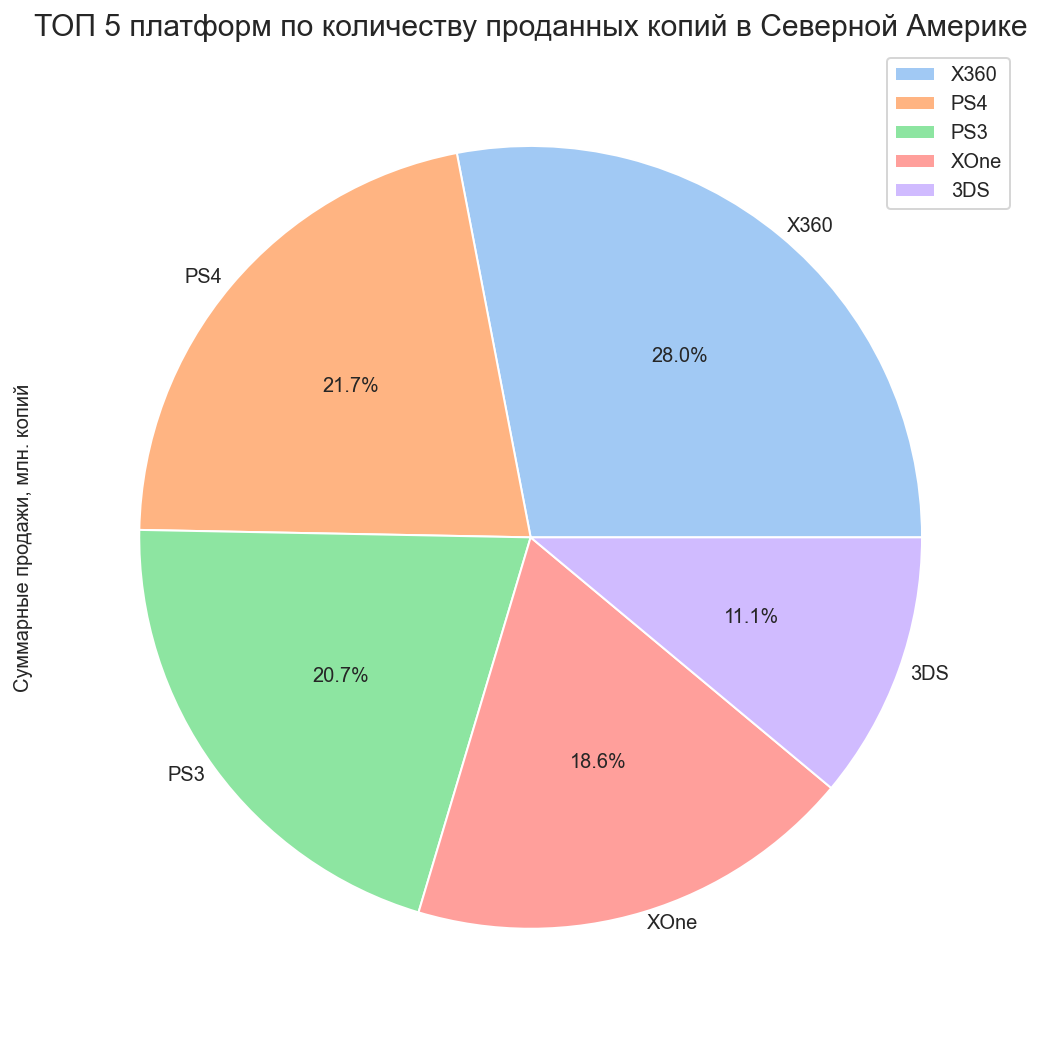

In [63]:
(
    df_actual
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head(5)
    .plot(kind='pie', y='na_sales', figsize=(9, 9), autopct='%1.1f%%', labeldistance=1.03)
)
plt.title('ТОП 5 платформ по количеству проданных копий в Северной Америке', fontsize=15)
plt.ylabel('Суммарные продажи, млн. копий')
plt.legend(loc=1)  # Расположение легенды (1 - правый верхний угол)
plt.show()

#### ТОП 5 жанров

In [64]:
# Северная Америка
(
    df_actual
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head(5)
    .reset_index()
    .rename({'genre':'Genre', 'na_sales':'North America sales'}, axis='columns')
)

,Genre,North America sales
0,Action,180.15
1,Shooter,144.79
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


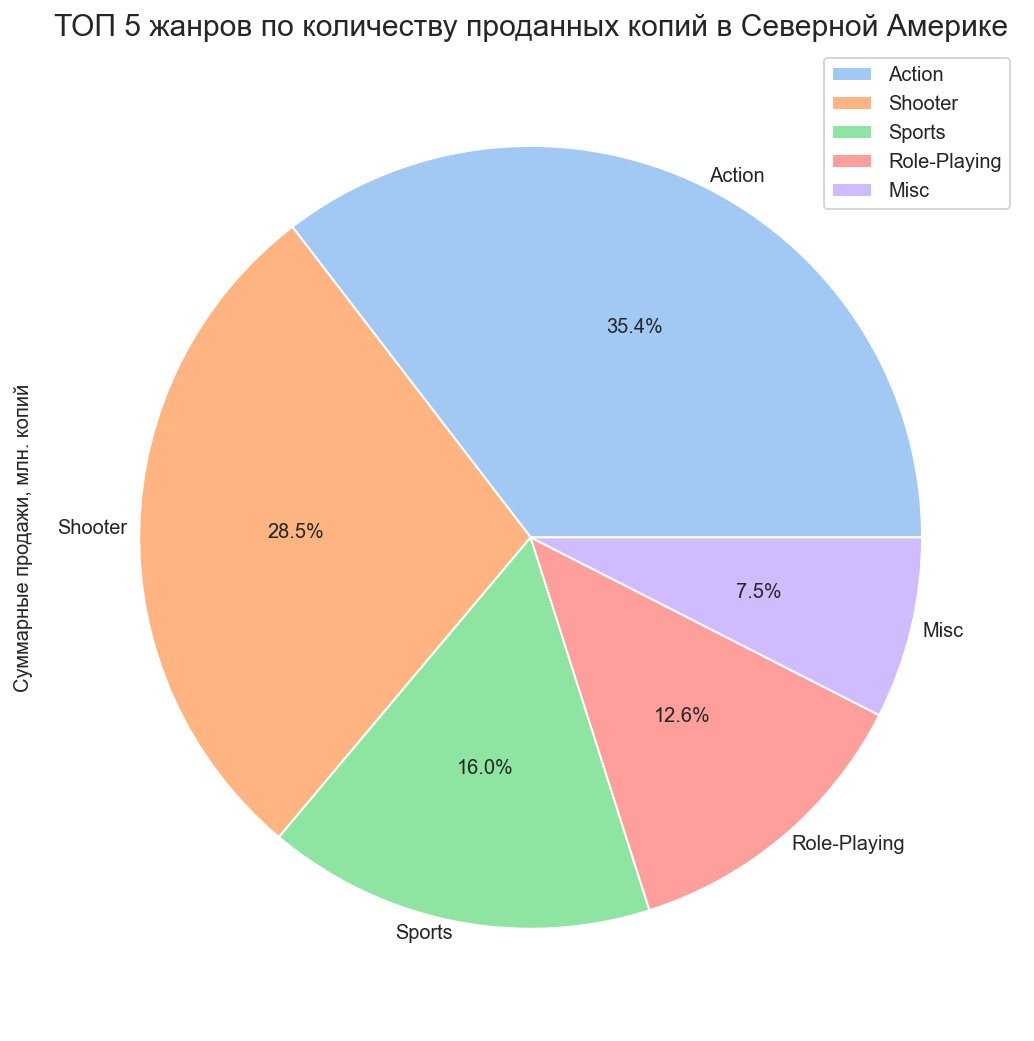

In [65]:
(
    df_actual
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head(5)
    .plot(kind='pie', y='na_sales', figsize=(9, 9), autopct='%1.1f%%', labeldistance=1.03)
)
plt.title('ТОП 5 жанров по количеству проданных копий в Северной Америке', fontsize=15)
plt.ylabel('Суммарные продажи, млн. копий')
plt.legend(loc=1) 
plt.show()

#### Продажи по рейтингам ESRB

In [66]:
# Северная Америка
(
    df_actual
    .pivot_table(index='rating_dec', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head(5)
    .reset_index()
    .rename({'rating_dec':'ESRB rating', 'na_sales':'North America sales'}, axis='columns')
)

,ESRB rating,North America sales
0,Mature,231.67
1,Everyone,114.37
2,Rating Pending,103.31
3,Everyone 10 and older,77.93
4,Teen,66.02


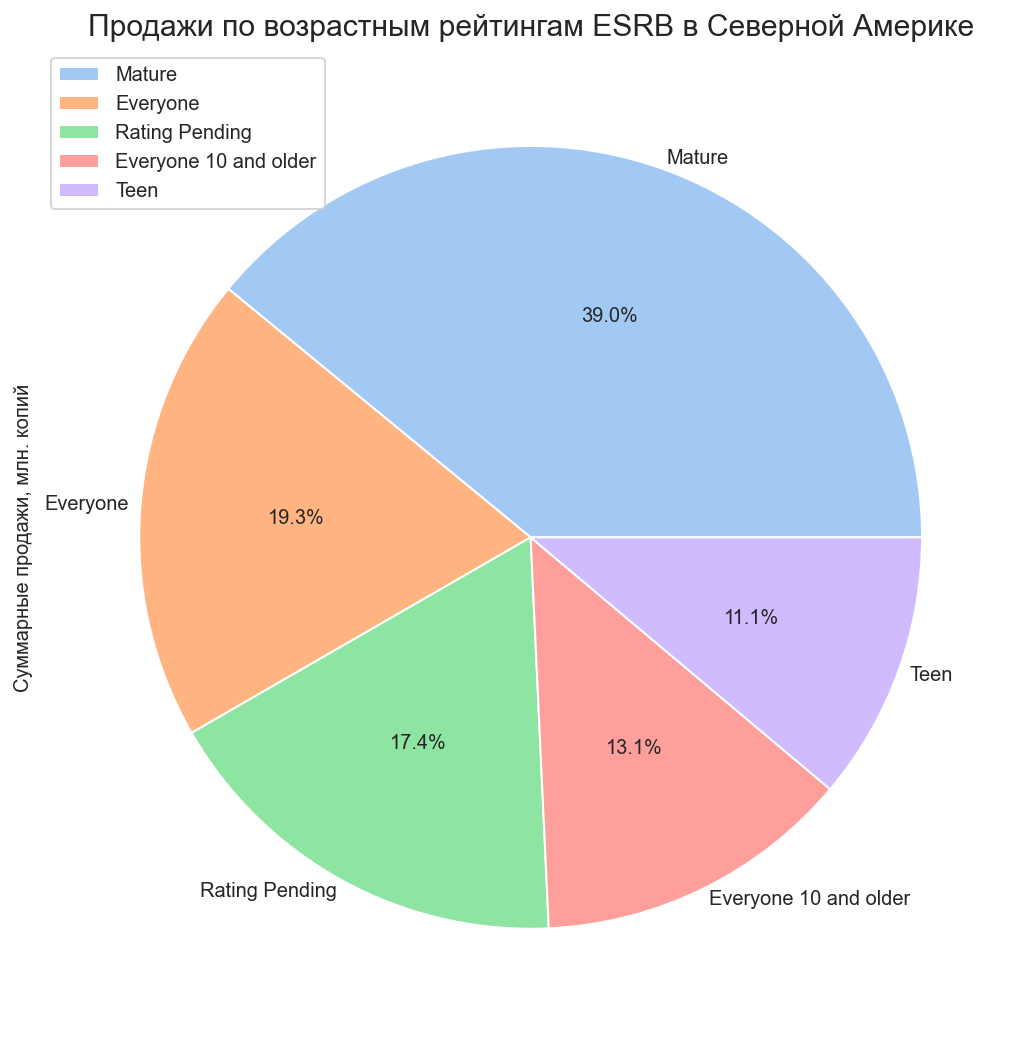

In [67]:
(
    df_actual
    .pivot_table(index='rating_dec', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head(5)
    .plot(kind='pie', y='na_sales', figsize=(9, 9), autopct='%1.1f%%', labeldistance=1.03)
)
plt.title('Продажи по возрастным рейтингам ESRB в Северной Америке', fontsize=15)
plt.ylabel('Суммарные продажи, млн. копий')
plt.legend(loc=2)
plt.show()

#### Выводы:
На основании представленных данных, мы можем сделать следующие выводы о пользователях в регионе <b>Северная Америка</b>:
1. Самые популярные платформы: X360 (28% продаж), PS4 (22% продаж), PS3 (21% продаж), XOne (19% продаж), 3DS (11% продаж).
2. Самые популярные жанры: Action, Shooter, Sports, Role-Playing, Misc.
3. Возрастные рейтинги самых популярных игр: Mature, Everyone, Rating Pending, Everyone 10 and older, Teen.

[Вернуться к оглавлению](#table_of_contents)

### <a name="europe_users"></a> Портрет пользователя: Европа

#### ТОП 5 платформ

In [68]:
# Европа
eu_grouped = (
    df_actual
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
    .reset_index()
    .rename({'platform':'Platform', 'eu_sales':'Europe sales'}, axis='columns')
)

# Добавим столбец с долями продаж
eu_grouped['Ratio'] = round(eu_grouped['Europe sales'] / eu_grouped['Europe sales'].sum(),2)

eu_grouped

,Platform,Europe sales,Ratio
0,PS4,141.09,0.34
1,PS3,107.27,0.26
2,X360,74.89,0.18
3,XOne,51.59,0.12
4,3DS,42.83,0.10


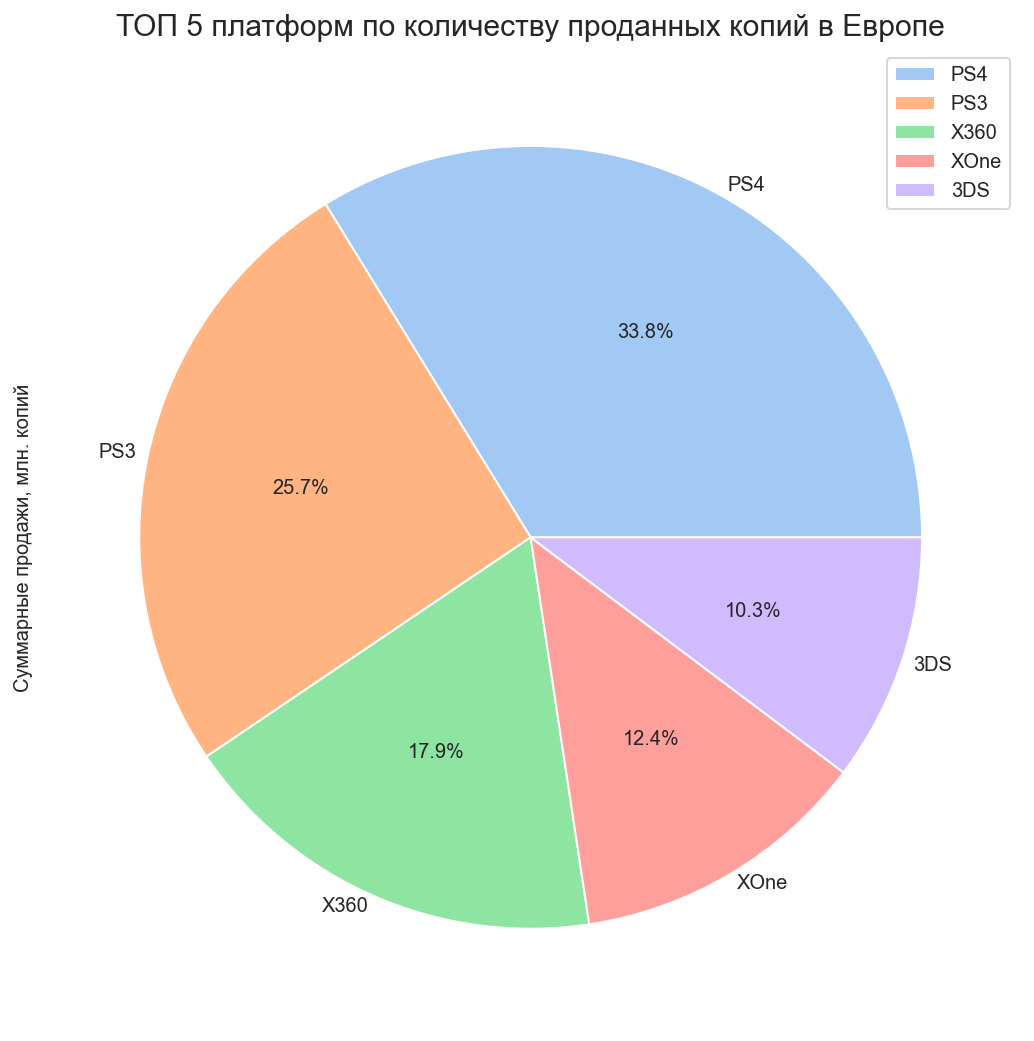

In [69]:
(
    df_actual
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
    .plot(kind='pie', y='eu_sales', figsize=(9, 9), autopct='%1.1f%%', labeldistance=1.03)
)
plt.title('ТОП 5 платформ по количеству проданных копий в Европе', fontsize=15)
plt.ylabel('Суммарные продажи, млн. копий')
plt.legend(loc=1)
plt.show()

#### ТОП 5 жанров

In [70]:
# Европа
(
    df_actual
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
    .reset_index()
    .rename({'genre':'Genre', 'eu_sales':'Europe sales'}, axis='columns')
)

,Genre,Europe sales
0,Action,161.70
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


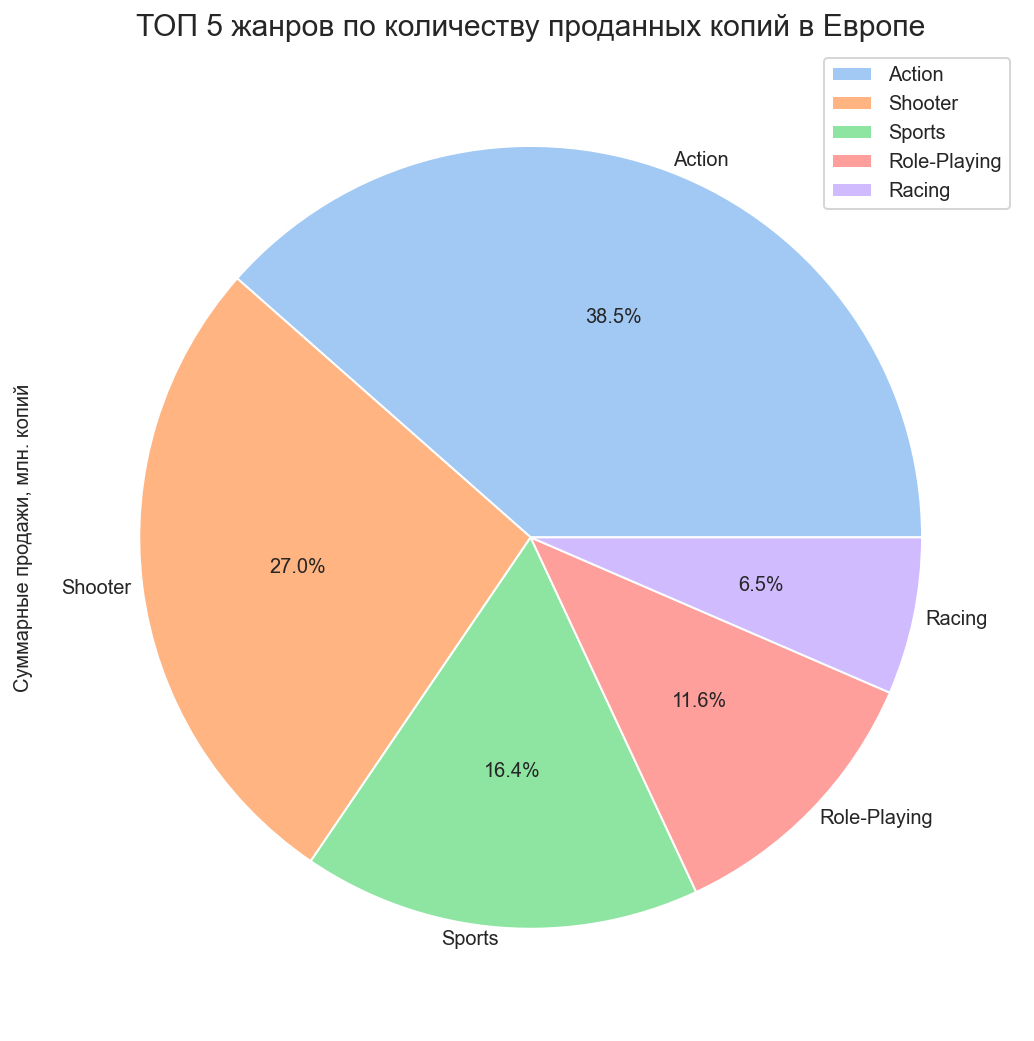

In [71]:
(
    df_actual
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
    .plot(kind='pie', y='eu_sales', figsize=(9, 9), autopct='%1.1f%%', labeldistance=1.03)
)
plt.title('ТОП 5 жанров по количеству проданных копий в Европе', fontsize=15)
plt.ylabel('Суммарные продажи, млн. копий')
plt.legend(loc=1)
plt.show()

#### Продажи по рейтингам ESRB

In [72]:
# Европа
(
    df_actual
    .pivot_table(index='rating_dec', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
    .reset_index()
    .rename({'rating_dec':'ESRB rating', 'eu_sales':'Europe sales'}, axis='columns')
)

,ESRB rating,Europe sales
0,Mature,194.44
1,Everyone,113.03
2,Rating Pending,91.50
3,Everyone 10 and older,57.25
4,Teen,52.96


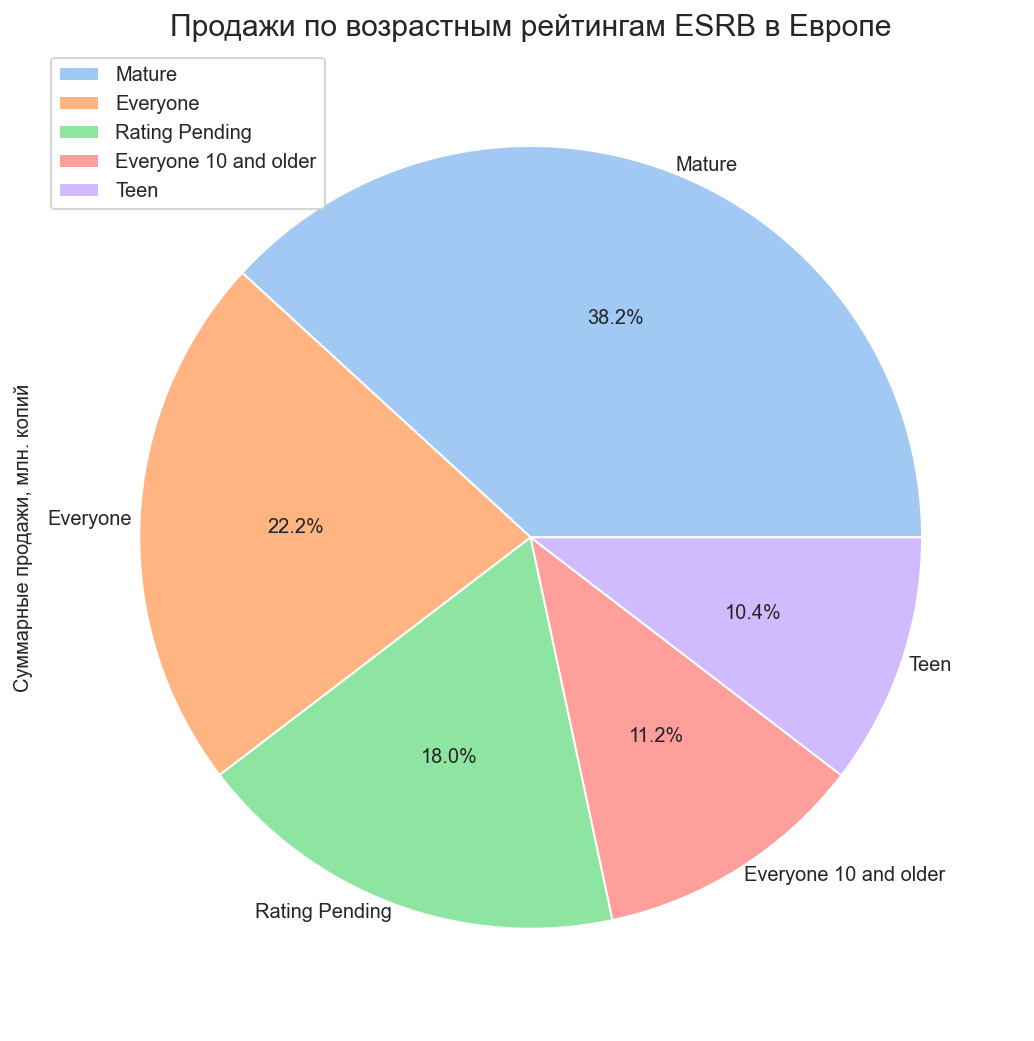

In [73]:
(
    df_actual
    .pivot_table(index='rating_dec', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
    .plot(kind='pie', y='eu_sales', figsize=(9, 9), autopct='%1.1f%%', labeldistance=1.02)
)
plt.title('Продажи по возрастным рейтингам ESRB в Европе', fontsize=15)
plt.ylabel('Суммарные продажи, млн. копий')
plt.legend(loc=2)
plt.show()

#### Выводы:
На основании представленных данных, мы можем сделать следующие выводы о пользователях в регионе <b>Европа</b>:
1. Самые популярные платформы: PS4 (34% продаж), PS3 (26% продаж), X360 (18% продаж), XOne (12% продаж), 3DS (10% продаж).
2. Самые популярные жанры: Action, Shooter, Sports, Role-Playing, Racing.
3. Возрастные рейтинги самых популярных игр: Mature, Everyone, Rating Pending, Everyone 10 and older, Teen.

[Вернуться к оглавлению](#table_of_contents)

### <a name="japan_users"></a> Портрет пользователя: Япония

#### ТОП 5 платформ

In [74]:
# Япония
jp_grouped = (
    df_actual
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
    .reset_index()
    .rename({'platform':'Platform', 'jp_sales':'Japan sales'}, axis='columns')
)

# Добавим столбец с долями продаж
jp_grouped['Ratio'] = round(jp_grouped['Japan sales'] / jp_grouped['Japan sales'].sum(),2)

jp_grouped

,Platform,Japan sales,Ratio
0,3DS,87.79,0.51
1,PS3,35.29,0.20
2,PSV,21.04,0.12
3,PS4,15.96,0.09
4,WiiU,13.01,0.08


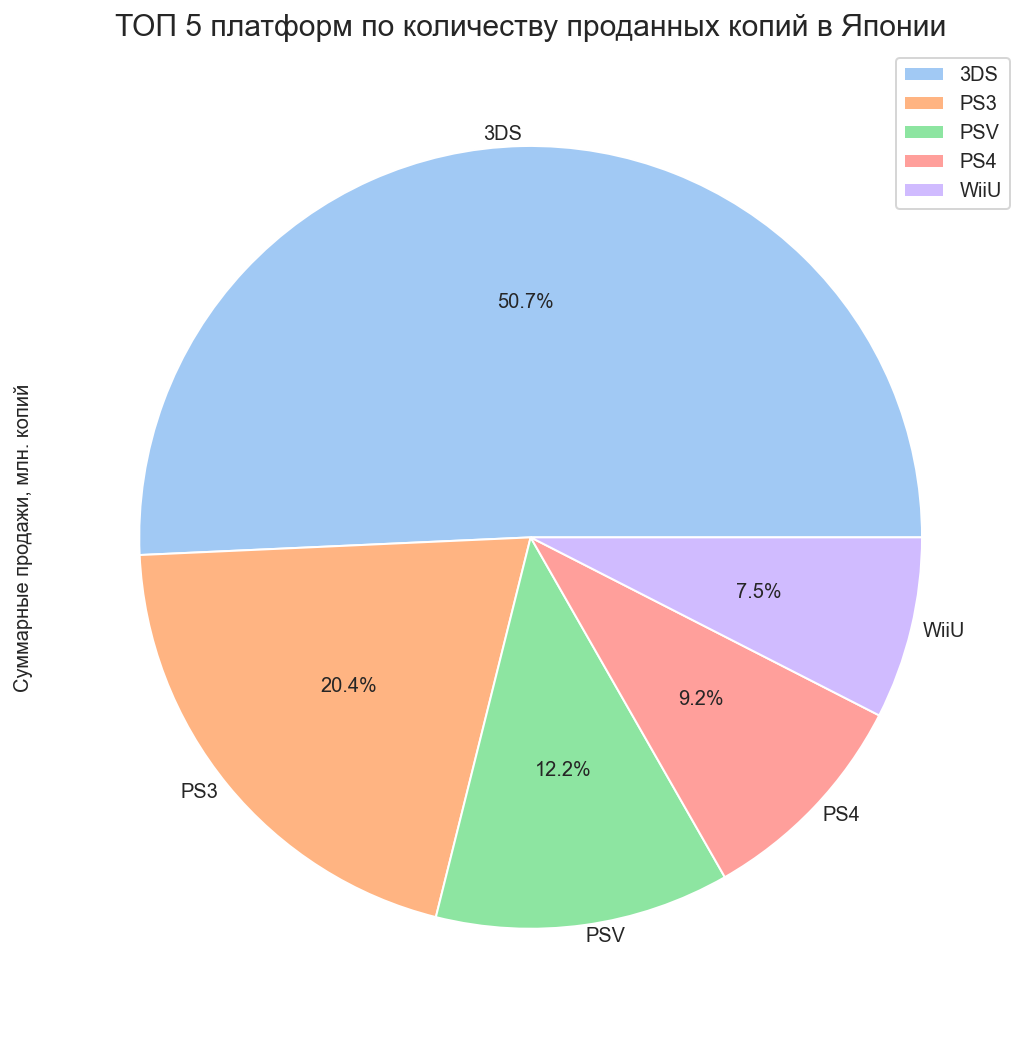

In [75]:
(
    df_actual
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
    .plot(kind='pie', y='jp_sales', figsize=(9, 9), autopct='%1.1f%%', labeldistance=1.03)
)
plt.title('ТОП 5 платформ по количеству проданных копий в Японии', fontsize=15)
plt.ylabel('Суммарные продажи, млн. копий')
plt.legend(loc=1)
plt.show()

#### ТОП 5 жанров

In [76]:
# Япония
(
    df_actual
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
    .reset_index()
    .rename({'genre':'Genre', 'jp_sales':'Japan sales'}, axis='columns')
)

,Genre,Japan sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,13.10
3,Simulation,10.41
4,Fighting,9.44


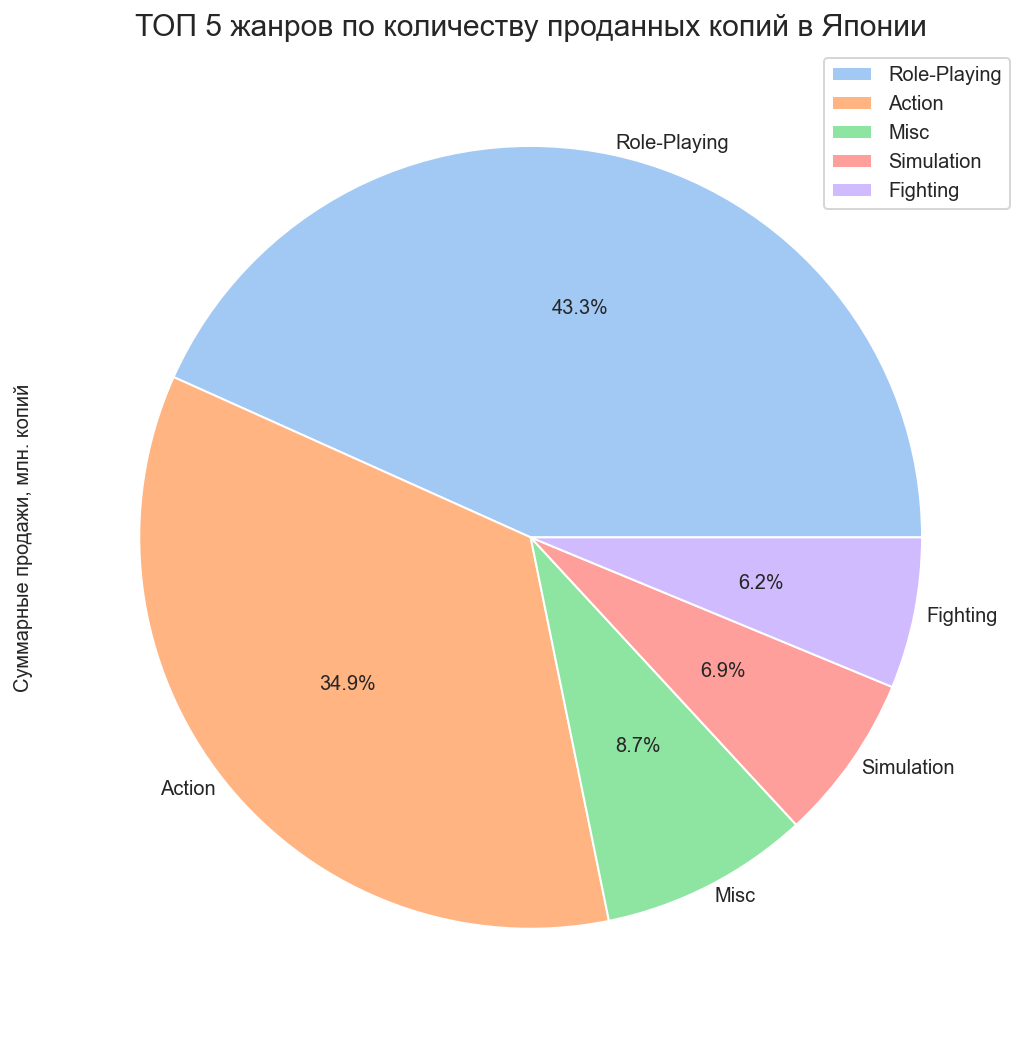

In [77]:
(
    df_actual
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
    .plot(kind='pie', y='jp_sales', figsize=(9, 9), autopct='%1.1f%%', labeldistance=1.03)
)
plt.title('ТОП 5 жанров по количеству проданных копий в Японии', fontsize=15)
plt.ylabel('Суммарные продажи, млн. копий')
plt.legend(loc=1)
plt.show()

#### Продажи по рейтингам ESRB

In [78]:
# Япония
(
    df_actual
    .pivot_table(index='rating_dec', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
    .reset_index()
    .rename({'rating_dec':'ESRB rating', 'jp_sales':'Japan sales'}, axis='columns')
)

,ESRB rating,Japan sales
0,Rating Pending,109.08
1,Everyone,28.33
2,Teen,26.02
3,Mature,21.20
4,Everyone 10 and older,8.19


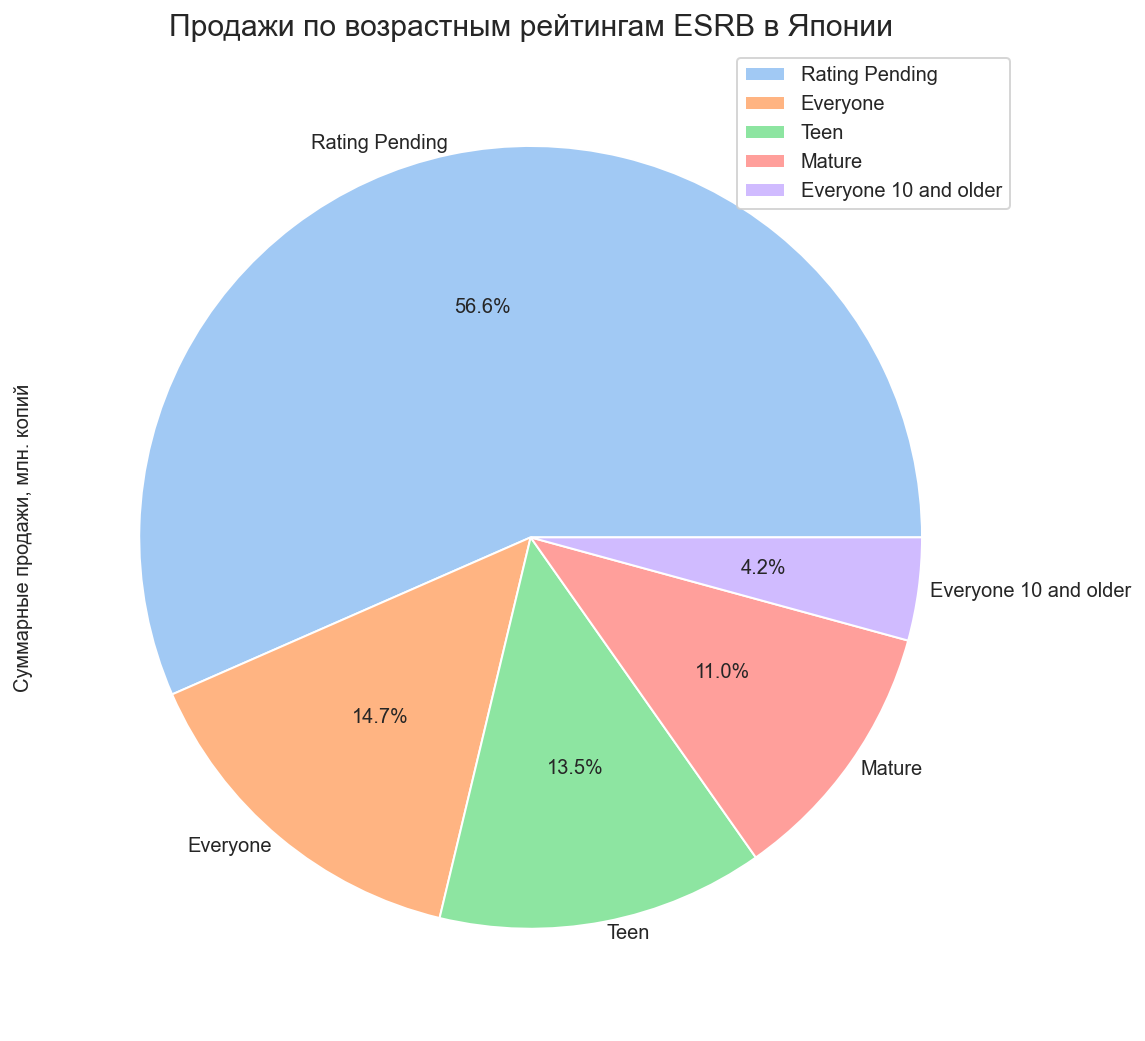

In [79]:
(
    df_actual
    .pivot_table(index='rating_dec', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
    .plot(kind='pie', y='jp_sales', figsize=(9, 9), autopct='%1.1f%%', labeldistance=1.03)
)
plt.title('Продажи по возрастным рейтингам ESRB в Японии', fontsize=15)
plt.ylabel('Суммарные продажи, млн. копий')
plt.legend(loc=1)
plt.show()

#### Выводы:
На основании представленных данных, мы можем сделать следующие выводы о пользователях в регионе <b>Япония</b>:
1. Самые популярные платформы: 3DS (51% продаж), PS3 (20% продаж), PSV (12% продаж), PS4 (9% продаж), WiiU (8% продаж).
2. Самые популярные жанры: Role-Playing, Action, Misc, Simulation, Fighting.
3. Возрастные рейтинги самых популярных игр: Rating Pending, Everyone, Teen, Mature, Everyone.

### Выводы по портретам пользователей для разных регионов:
1. <b>Популярные платформы</b>. Предпочтения пользователей из Северной Америки и Европы практически не отличаются - первые 3 места делят между собой PS4, X360 и XOne. Предпочтения пользователей из Японии значительно отличаются - их выбор это 3DS, PS3 и PSV (PlayStation Vita).
2. <b>Популярные жанры</b>. Жанры, популярные у пользователей из Северной Америки, не менее популярны у пользователей из Европы - первые 4 места: Action, Shooter, Sports, Role-Playing совпадают у пользователей из этих регионов. Различия есть только в последних жанрах из ТОП 5: для Северной Америки это Misc (Miscellaneous game), а для Европы - Racing. У пользователей из Японии самый популярный жанр - Role-Playing, на втором месте Action. Остальные места рейтинга ТОП 5 занимают Misc, Simulation, Fighting.
3. <b>Возрастные рейтинги ESRB</b>. Возрастные рейтинги игр, популярных в Северной Америке и Европе полностью совпадают: Mature, Everyone, Rating Pending, Everyone 10 and older, Teen. В Японии распределение рейтингов отличается, но не значительно: Rating Pending, Everyone, Teen, Mature, Everyone 10 and older.

[Вернуться к оглавлению](#table_of_contents)

## <a name="stat_hyp_test"></a> Проверка статистических гипотез

### <a name="hyp_avg_user_score_platform"></a> Гипотеза о различии пользовательских оценок игр для платформ Xbox One и PC

$Н_{0}$ - Средние оценки пользователей для платформ Xbox One и PC <b>одинаковые</b>.

$Н_{1}$ - Средние оценки пользователей для платформ Xbox One и PC <b>различаются</b>.

α = 5%

In [80]:
# Сохраним в переменные значения user_score для выбранных платформ за актуальный период
xone_user_score = df_actual.query('platform == "XOne" and user_score !=101')['user_score']
pc_user_score = df_actual.query('platform == "PC" and user_score !=101')['user_score']

# Критический уровень статистической значимости
alpha = .05

# Найдем дисперсии для каждой выборки
xone_var = np.var(xone_user_score)
pc_var = np.var(pc_user_score)

print('Дисперсия выборки по платформе Xbox One равна:', xone_var)
print('Дисперсия выборки по платформе PC равна:', pc_var)

Дисперсия выборки по платформе Xbox One равна: 189.65188383045532
Дисперсия выборки по платформе PC равна: 273.4138496439883


In [81]:
# Используем тест Левена, чтобы проверить гипотезу о равенстве дисперсий
levene = st.levene(xone_user_score, pc_user_score)

print('p-значение:', levene.pvalue)

if levene.pvalue < alpha:
    print("Дисперсии выборок различаются")
else:
    print("Дисперсии выборок равны") 

p-значение: 0.014264583982264795
Дисперсии выборок различаются


#### Проведя тест Левена, отвергаем гипотезу о равенстве дисперсий двух выборок.

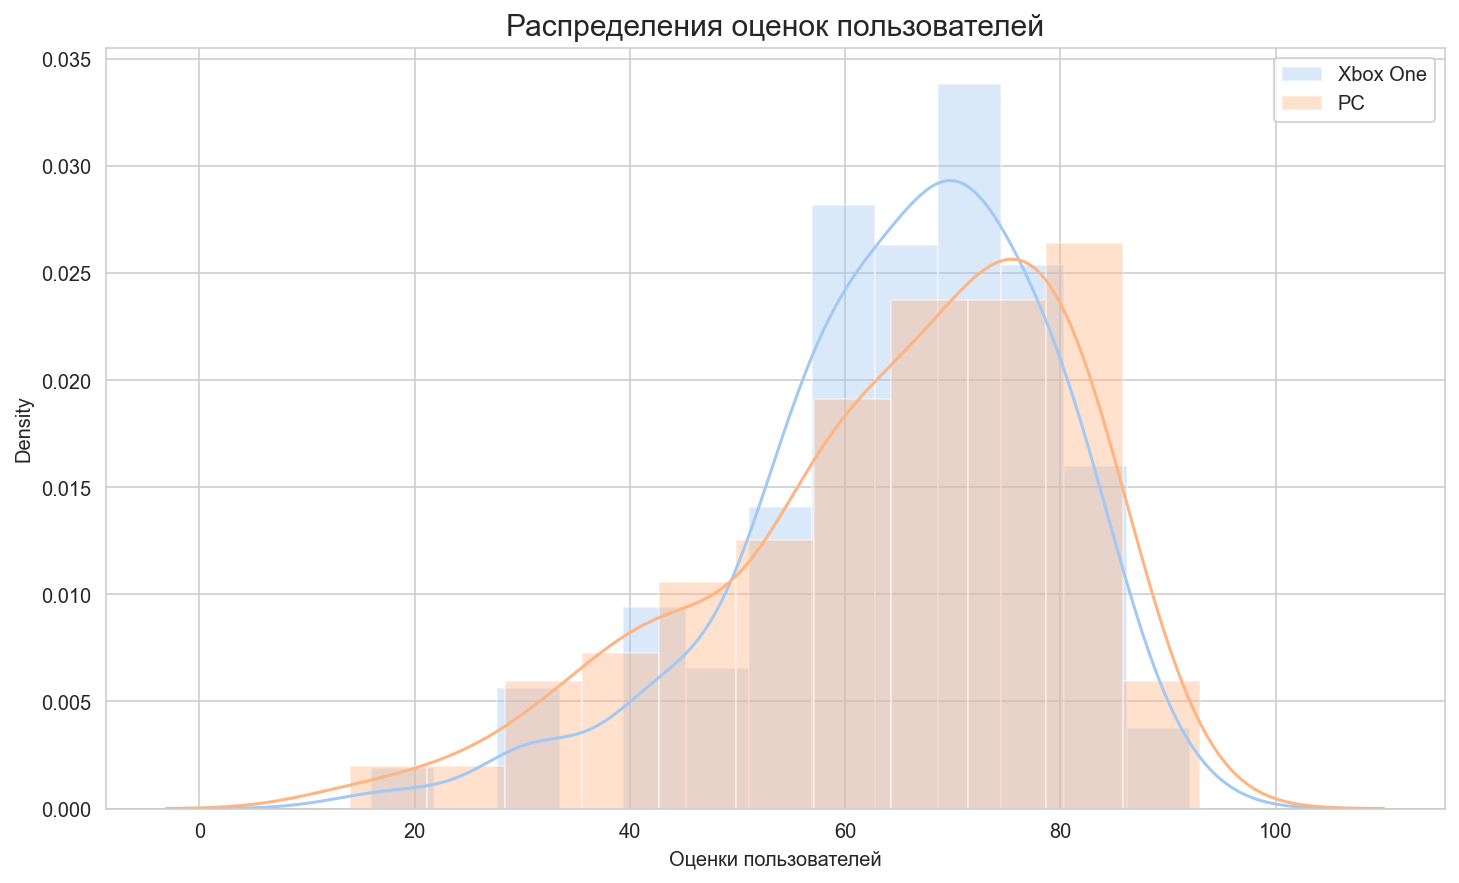

In [82]:
plt.figure(figsize=(12,7))
plt.title('Распределения оценок пользователей', fontsize=15)
sb.distplot(xone_user_score, label='Xbox One', kde=True,)
sb.distplot(pc_user_score, label='PC', kde=True)
plt.xlabel("Оценки пользователей")
plt.legend()
plt.show()

#### Распределение каждой из выборок имеет четко выраженный скос в левую сторону.

#### Для проверки гипотезы воспользуемся методом ttest_ind. 
##### На графике распределений двух выборок мы видим, что представленные распределения отличаются от нормального. Поэтому используем тест Стьюдента.
#####  Несмотря на то, что выборки получены из одного набора данных, они относятся к разным игровым платформам, поэтому использовать тест для связанных выборок будет некорректно. Вместо него используем тест для независимых выборок.

In [83]:
# Параметру equal_var передадим значение False т.к. ранее мы выяснили, что дисперсии двух выборок отличаются
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.6206366351489752
Не получилось отвергнуть нулевую гипотезу


In [84]:
# Построим сводную таблицу и оценим средние значения пользовательских оценок
(
    df_actual
    .query('platform == "XOne" or platform == "PC" and user_score !=101')
    .pivot_table(index='platform', values='user_score', aggfunc='mean')
)

,user_score
platform,
PC,64.45
XOne,74.63


#### Вывод:
Результат проверки гипотезы о различии пользовательских оценок для платформ Xbox One и PC не позволяет отвергнуть нулевую гипотезу. Различия в средних оценках пользователей для этих платформ статистически не значительны.

[Вернуться к оглавлению](#table_of_contents)

### <a name="hyp_avg_user_score_genre"></a> Гипотеза о различии пользовательских рейтингов для игр жанров Action и Sports

$Н_{0}$ - Средние оценки пользователей для жанров Action и Sports <b>одинаковые</b>.

$Н_{1}$ - Средние оценки пользователей для жанров Action и Sports <b>различаются</b>.

α = 5%

In [85]:
# Сохраним в переменные значения user_score для выбранных платформ за актуальный период
action_user_score = df_actual.query('genre == "Action" and user_score !=101')['user_score']
sports_user_score = df_actual.query('genre == "Sports" and user_score !=101')['user_score']

# Критический уровень статистической значимости
alpha = .05

# Найдем дисперсии для каждой выборки
action_var = np.var(action_user_score)
sports_var = np.var(sports_user_score)

print('Дисперсия выборки для жанра Action равна:', action_var)
print('Дисперсия выборки для жанра Sports равна:', sports_var)

Дисперсия выборки для жанра Action равна: 187.83732502012685
Дисперсия выборки для жанра Sports равна: 300.73882971729125


In [86]:
# Используем тест Левена, чтобы проверить гипотезу о равенстве дисперсий
levene = st.levene(action_user_score, sports_user_score)

print('p-значение:', levene.pvalue)

if levene.pvalue < alpha:
    print("Дисперсии выборок различаются")
else:
    print("Дисперсии выборок равны") 

p-значение: 1.8018286275085335e-05
Дисперсии выборок различаются


#### Проведя тест Левена, отвергаем гипотезу о равенстве дисперсий двух выборок.

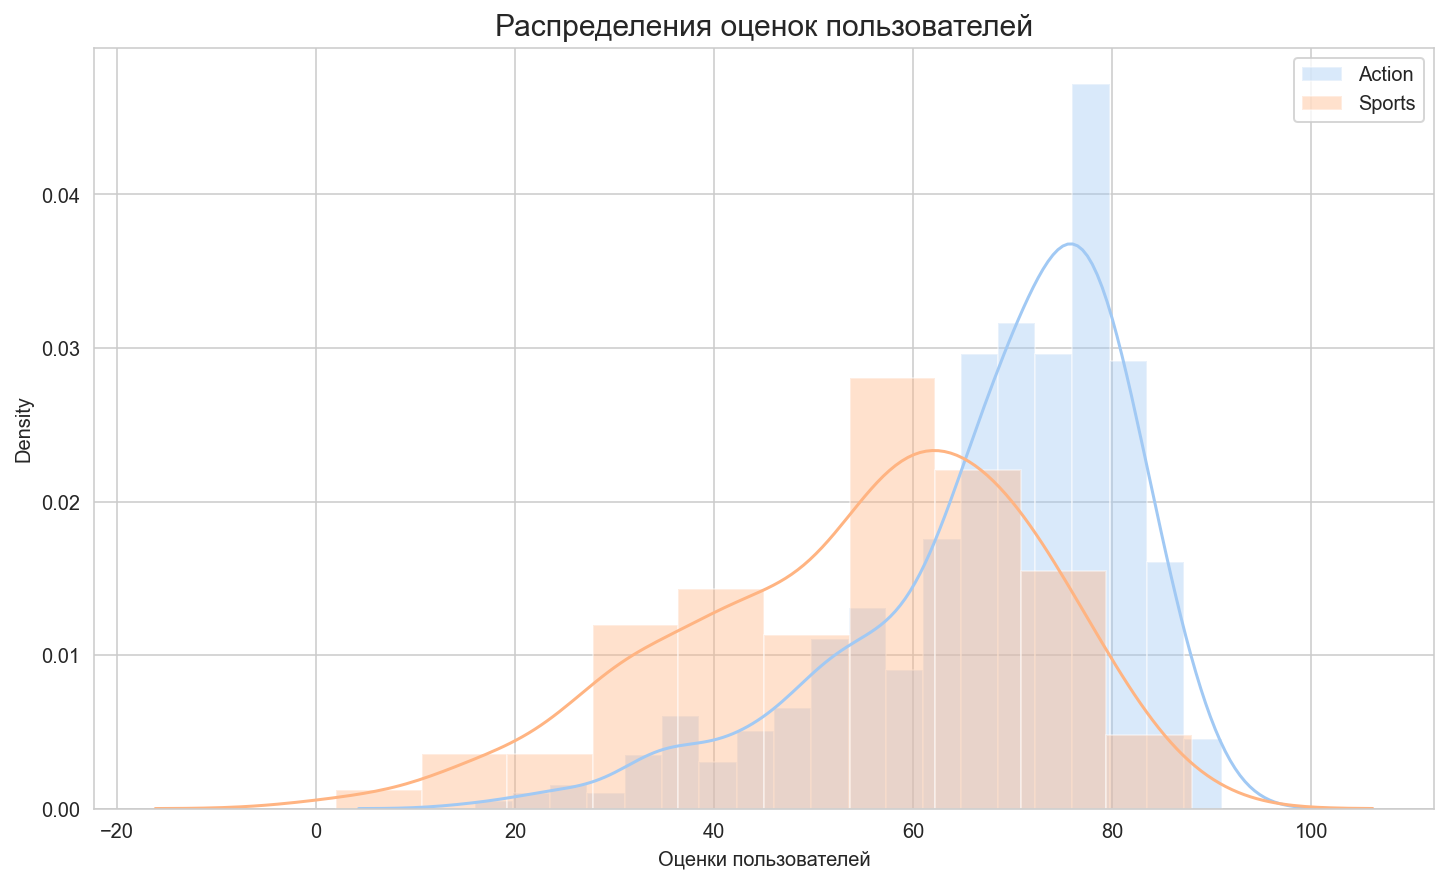

In [87]:
plt.figure(figsize=(12,7))
plt.title('Распределения оценок пользователей', fontsize=15)
sb.distplot(action_user_score, label='Action', kde=True,)
sb.distplot(sports_user_score, label='Sports', kde=True)
plt.xlabel("Оценки пользователей")
plt.legend()
plt.show()

#### Распределение каждой из выборок имеет четко выраженный скос в левую сторону.

#### Для проверки гипотезы воспользуемся методом ttest_ind. 
##### На графике распределений двух выборок мы видим, что представленные распределения отличаются от нормального. Поэтому используем тест Стьюдента.
#####  Несмотря на то, что выборки получены из одного набора данных, они относятся к разным игровым жанрам, поэтому использовать тест для связанных выборок будет некорректно. Вместо него используем тест для независимых выборок.

In [88]:
# Параметру equal_var передадим значение False т.к. ранее мы выяснили, что дисперсии двух выборок отличаются
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.337200239591977e-20
Отвергаем нулевую гипотезу


In [89]:
# Построим сводную таблицу и оценим средние значения пользовательских оценок
(
    df_actual
    .query('genre == "Action" or genre == "Sports" and user_score !=101')
    .pivot_table(index='genre', values='user_score', aggfunc='mean')
)

,user_score
genre,
Action,84.34
Sports,54.56


#### Вывод:
Результат проверки гипотезы о различии пользовательских оценок для жанров Action и Sports позволяет отвергнуть нулевую гипотезу. Различия в средних оценках пользователей для этих жанров статистически значимы.

[Вернуться к оглавлению](#table_of_contents)

## <a name="conclusion"></a>Общий вывод

### <a name="what_was_done"></a> Обзор проведенного анализа
В ходе проведенного анализа были сделаны следующие шаги:
1. Произведена первичная оценка предоставленных данных.
2. Выполнена предобработка данных: заполнены отсутствующие значения, типы данных приведены к необходимым для анализа.
3. В наборы данных добавлены новые столбцы (сумма продаж по всем регионам, расшифровка рейтингов ESRB).
4. Проведен исследовательский анализ данных (изучены продажи игр по годам, найден актуальный период для анализа, выбраны наиболее популярные платформы, изучена зависимость продаж от оценок критиков и пользователей).
5. Составлен портрет пользователя для каждого региона (Северная Америка, Европа, Япония).
5. Проверены гипотезы о равенстве средних значений.

### <a name="main_conclusions"></a> Главные выводы
1. Больше всего игр было продано в 2008 и 2009 году - на эти годы приходится пик популярности платформ Xbox 360 и PlayStation 3.
2. Характерный срок существования игровой платформы - 8 лет. Это связано с появлением новых поколений игровых платформ, в связи с чем прекращается поддержка старых.
3. В качестве актуального периода для анализа и дальнейшего построения прогноза был выбран период 2012 - 2016 гг. В этот период наиболее популярны платформы PS3, PS4, XOne, X360, 3DS, но лидером по продажам является PlayStation 4.
4. Оценки критиков оказывают существенное влияние на продажи игр для всех консолей. Также критики, в среднем, выставляют играм более высокие оценки, чем игроки.
5. В Северной Америке и Европе популярны игровые платформы PlayStation 4, Xbox 360 и Xbox One. В Японии более популярны платформы 3DS, PlayStation 3 и PlayStation Vita. Похоже, что пользователи из Японии отдают предпочтение портативным консолям.
6. Жанры Action и Shooter популярны у пользователей из Северной Америки и Европы, а пользователи из Японии предпочитают жанры Role-Playing и Action.
7. Продажи игр с возрастным рейтингом "Mature" (Для взрослых) преобладают в Северной Америке и Европе, в Японии преобладают игры с рейтингом "Rating Pending" (Рейтинг не определён). Возможно, это связано с спецификой внутреннего рынка Японии.

### <a name="recommendations"></a> Рекомендации
В качестве рекомендаций, на основании проведенного анализа, предлагаю следующее:
1. В первую очередь стоит обратить внимание на игры для консолей PlayStation и Xbox. 
2. Предпочтения пользователей в Северной Америке и Европе во многом совпадают, поэтому при разработке рекламных компаний следует рассмотреть возможность адаптации рекламы для пользователей каждого из двух регионов.
3. На рынке Японии, в отличие от Северной Америки и Европы, преобладают портативные консоли. В связи с этим, стоит провести дополнительный анализ ёмкости рынка, прежде чем планировать продажи в этом регионе. 

[Вернуться к оглавлению](#table_of_contents)